# Load Data

In [ ]:
! gdown --fuzzy "https://drive.google.com/file/d/1MQwhsmim8FUh0s8lwb63TEDWUMcH9xZT/view?usp=sharing"
! unzip -q vacancy.zip

In [2]:
import pandas as pd

df = pd.read_csv("train_split.tsv", sep="\t")
print(df.shape)
df.head(15)

(49051, 28)


,id,name,employer_name,experience_name,schedule_name,key_skills_name,accept_handicapped,accept_kids,unified_address_city,unified_address_state,...,lemmaized_wo_stopwords_raw_branded_description,if_foreign_language,is_branded_description,name_clean,employment_name,employer_id,employer_industries,salary_mean_net,lemmaized_wo_stopwords_raw_description_salaries,lemmaized_wo_stopwords_raw_branded_description_salaries
0,45509601,"Менеджер по продажам семян, СЗР, биопрепаратов...",БиоАгроСервис,От 1 года до 3 лет,Полный день,активные продажи,False,False,NaN,Орловская область,...,NaN,Не указано,заполнено,менеджер продажа семя сзр биопрепарат регионал...,Полная занятость,2494052.0,не указано,115275.0,"[45000, 70000, 70000, 45000, 70000]",NaN
1,49746801,Врач-патологоанатом отделения общей патологии ...,ГАУЗ ТО МКМЦ медицинский город,Нет опыта,Полный день,пользователь пк,False,False,Тюмень,Тюменская область,...,NaN,Не указано,заполнено,врач патологоанатом отделение общий патология ...,Проектная работа,1722760.0,исследовательский центр,65000.0,NaN,NaN
2,47685201,Инженер отдела материально-технического обеспе...,КВАРЦ Групп,Нет опыта,Полный день,работа с поставщиками,False,False,Уфа,Башкортостан,...,NaN,Не указано,заполнено,инженер отдел материально технический обеспечение,Полная занятость,1159319.0,теплоэнергетика,32500.0,"[35000, 20000, 20000]",NaN
3,44908803,Начальник ювелирного производства,Русское Золото,От 1 года до 3 лет,Полный день,не указано,False,False,Новосибирск,Новосибирская область,...,NaN,Не указано,заполнено,начальник ювелирный производство,Полная занятость,4961777.0,не указано,91350.0,NaN,NaN
4,44175601,Инженер-технолог 3 категории,Управление перспективных технологий,От 1 года до 3 лет,Полный день,solidworks,False,False,Москва,Москва,...,NaN,Не указано,заполнено,инженер технолог 3 категория,Полная занятость,76492.0,мобильная связь,47850.0,NaN,NaN
5,48236801,Торговый представитель (г.Павловский Посад),Традиция,От 1 года до 3 лет,Полный день,активные продажи,False,False,NaN,Московская область,...,NaN,Не указано,заполнено,торговый представитель г. павловский посад,Полная занятость,5703798.0,оптовая торговля,70000.0,[90017],NaN
6,43212602,Главный специалист-ревизор,Самарское РО ФСС РФ,От 3 до 6 лет,Полный день,бухгалтерский учет,False,False,Самара,Самарская область,...,NaN,Не указано,заполнено,главный специалист ревизор,Полная занятость,3178678.0,не указано,20500.0,NaN,NaN
7,43168800,Ведущий инженер ОВиК,Cornerstone Russia,Более 6 лет,Полный день,autocad,False,False,Москва,Москва,...,NaN,Не указано,заполнено,ведущий инженер овик,Полная занятость,1068.0,кадровые агентства,100000.0,NaN,NaN
8,46964002,Дежурный техник,Домейн,От 3 до 6 лет,Сменный график,не указано,False,False,NaN,Краснодарский край,...,NaN,Не указано,заполнено,дежурный техника,Полная занятость,2276825.0,игорный бизнес,41760.0,NaN,NaN
9,41177000,Главный бухгалтер,Топассистент,Более 6 лет,Полный день,финансовая отчетность,False,False,Астрахань,Астраханская область,...,NaN,Не указано,заполнено,главный бухгалтер,Полная занятость,2066667.0,консалтинговые услуги,130500.0,NaN,NaN


# EDA

## Статистика по пропускам в данных


In [3]:
# Общая информация о датасете
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} колонок\n")

# Статистика по пропускам
missing_stats = pd.DataFrame({
    'Колонка': df.columns,
    'Пропуски': df.isnull().sum(),
    'Процент пропусков': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_stats = missing_stats[missing_stats['Пропуски'] > 0].sort_values('Пропуски', ascending=False)

print("Статистика по пропускам:")
print(missing_stats.to_string(index=False))


Размер датасета: 49051 строк, 28 колонок

Статистика по пропускам:
                                                Колонка  Пропуски  Процент пропусков
lemmaized_wo_stopwords_raw_branded_description_salaries     47681              97.21
                                raw_branded_description     45090              91.92
         lemmaized_wo_stopwords_raw_branded_description     45090              91.92
        lemmaized_wo_stopwords_raw_description_salaries     37893              77.25
                                   unified_address_city     11480              23.40
                                            employer_id        42               0.09
                                 unified_address_region         6               0.01


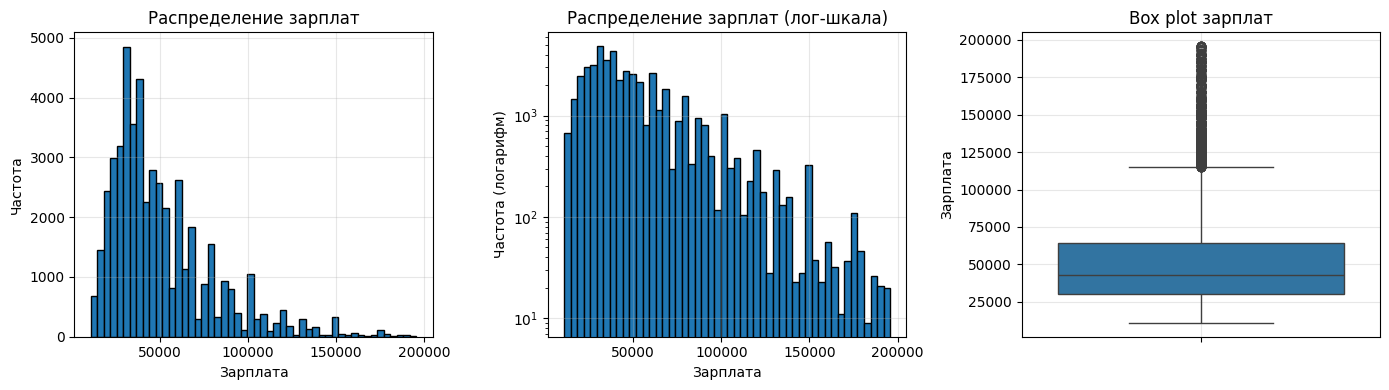


Статистика по зарплатам:
count     49051.000000
mean      51051.704897
std       29521.787882
min       10931.550000
25%       30000.000000
50%       42920.000000
75%       64000.000000
max      195750.000000
Name: salary_mean_net, dtype: float64


In [4]:
# Распределение целевой переменной
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.hist(df['salary_mean_net'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зарплат')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['salary_mean_net'].dropna(), bins=50, edgecolor='black', log=True)
plt.xlabel('Зарплата')
plt.ylabel('Частота (логарифм)')
plt.title('Распределение зарплат (лог-шкала)')
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
sns.boxplot(y=df['salary_mean_net'])
plt.ylabel('Зарплата')
plt.title('Box plot зарплат')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nСтатистика по зарплатам:")
print(df['salary_mean_net'].describe())


In [5]:
# Анализ числовых признаков
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'salary_mean_net']

print("Числовые признаки:")
print(numerical_cols)

# Корреляция числовых признаков с таргетом
if numerical_cols:
    correlations = []
    for col in numerical_cols:
        if df[col].notna().sum() > 0:
            corr = df[[col, 'salary_mean_net']].corr().iloc[0, 1]
            correlations.append({'Признак': col, 'Корреляция': corr})
    
    corr_df = pd.DataFrame(correlations).sort_values('Корреляция', key=abs, ascending=False)
    print("\nКорреляция числовых признаков с зарплатой:")
    print(corr_df.to_string(index=False))


Числовые признаки:
['id', 'employer_id']

Корреляция числовых признаков с зарплатой:
    Признак  Корреляция
         id    0.112091
employer_id    0.006144


In [6]:
# Анализ категориальных признаков с помощью статистики
from scipy.stats import f_oneway

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['id', 'name', 'employer_name']]

print(f"Категориальные признаки для анализа: {len(categorical_cols)}\n")

# Для каждого категориального признака посчитаем статистику
results = []

for col in categorical_cols:
    # Пропускаем колонки с большим количеством пропусков
    if df[col].notna().sum() < 100:
        continue
    
    # Создаем временный датафрейм без пропусков
    temp_df = df[[col, 'salary_mean_net']].dropna()
    
    if len(temp_df) < 100:
        continue
    
    # Количество уникальных значений
    n_unique = temp_df[col].nunique()
    
    # Если категорий слишком много, пропускаем
    if n_unique > 50:
        print(f"skip {col}")
        continue
    
    # Группируем по категориям и считаем средние зарплаты
    grouped = temp_df.groupby(col)['salary_mean_net'].agg(['mean', 'median', 'count'])
    
    # ANOVA F-statistic для проверки различий средних между группами
    groups = [group['salary_mean_net'].values for name, group in temp_df.groupby(col) if len(group) > 1]
    
    if len(groups) > 1:
        f_stat, p_value = f_oneway(*groups)
        
        results.append({
            'Признак': col,
            'Уникальных значений': n_unique,
            'F-статистика': f_stat,
            'p-value': p_value,
            'Значимость': 'Да' if p_value < 0.05 else 'Нет'
        })

results_df = pd.DataFrame(results).sort_values('F-статистика', ascending=False)
print("Анализ значимости категориальных признаков (ANOVA):")
print(results_df.to_string(index=False))


Категориальные признаки для анализа: 23

skip key_skills_name
skip unified_address_city
skip unified_address_state
skip professional_roles_name
skip raw_description
skip raw_branded_description
skip lemmaized_wo_stopwords_raw_description
skip lemmaized_wo_stopwords_raw_branded_description
skip name_clean
skip employer_industries
skip lemmaized_wo_stopwords_raw_description_salaries
skip lemmaized_wo_stopwords_raw_branded_description_salaries
Анализ значимости категориальных признаков (ANOVA):
                      Признак  Уникальных значений  F-статистика      p-value Значимость
              experience_name                    4   2842.221568 0.000000e+00         Да
                schedule_name                    5   1785.230121 0.000000e+00         Да
       unified_address_region                    8    346.365584 0.000000e+00         Да
          if_foreign_language                    2    322.615737 6.636684e-72         Да
       is_branded_description                    2    217.

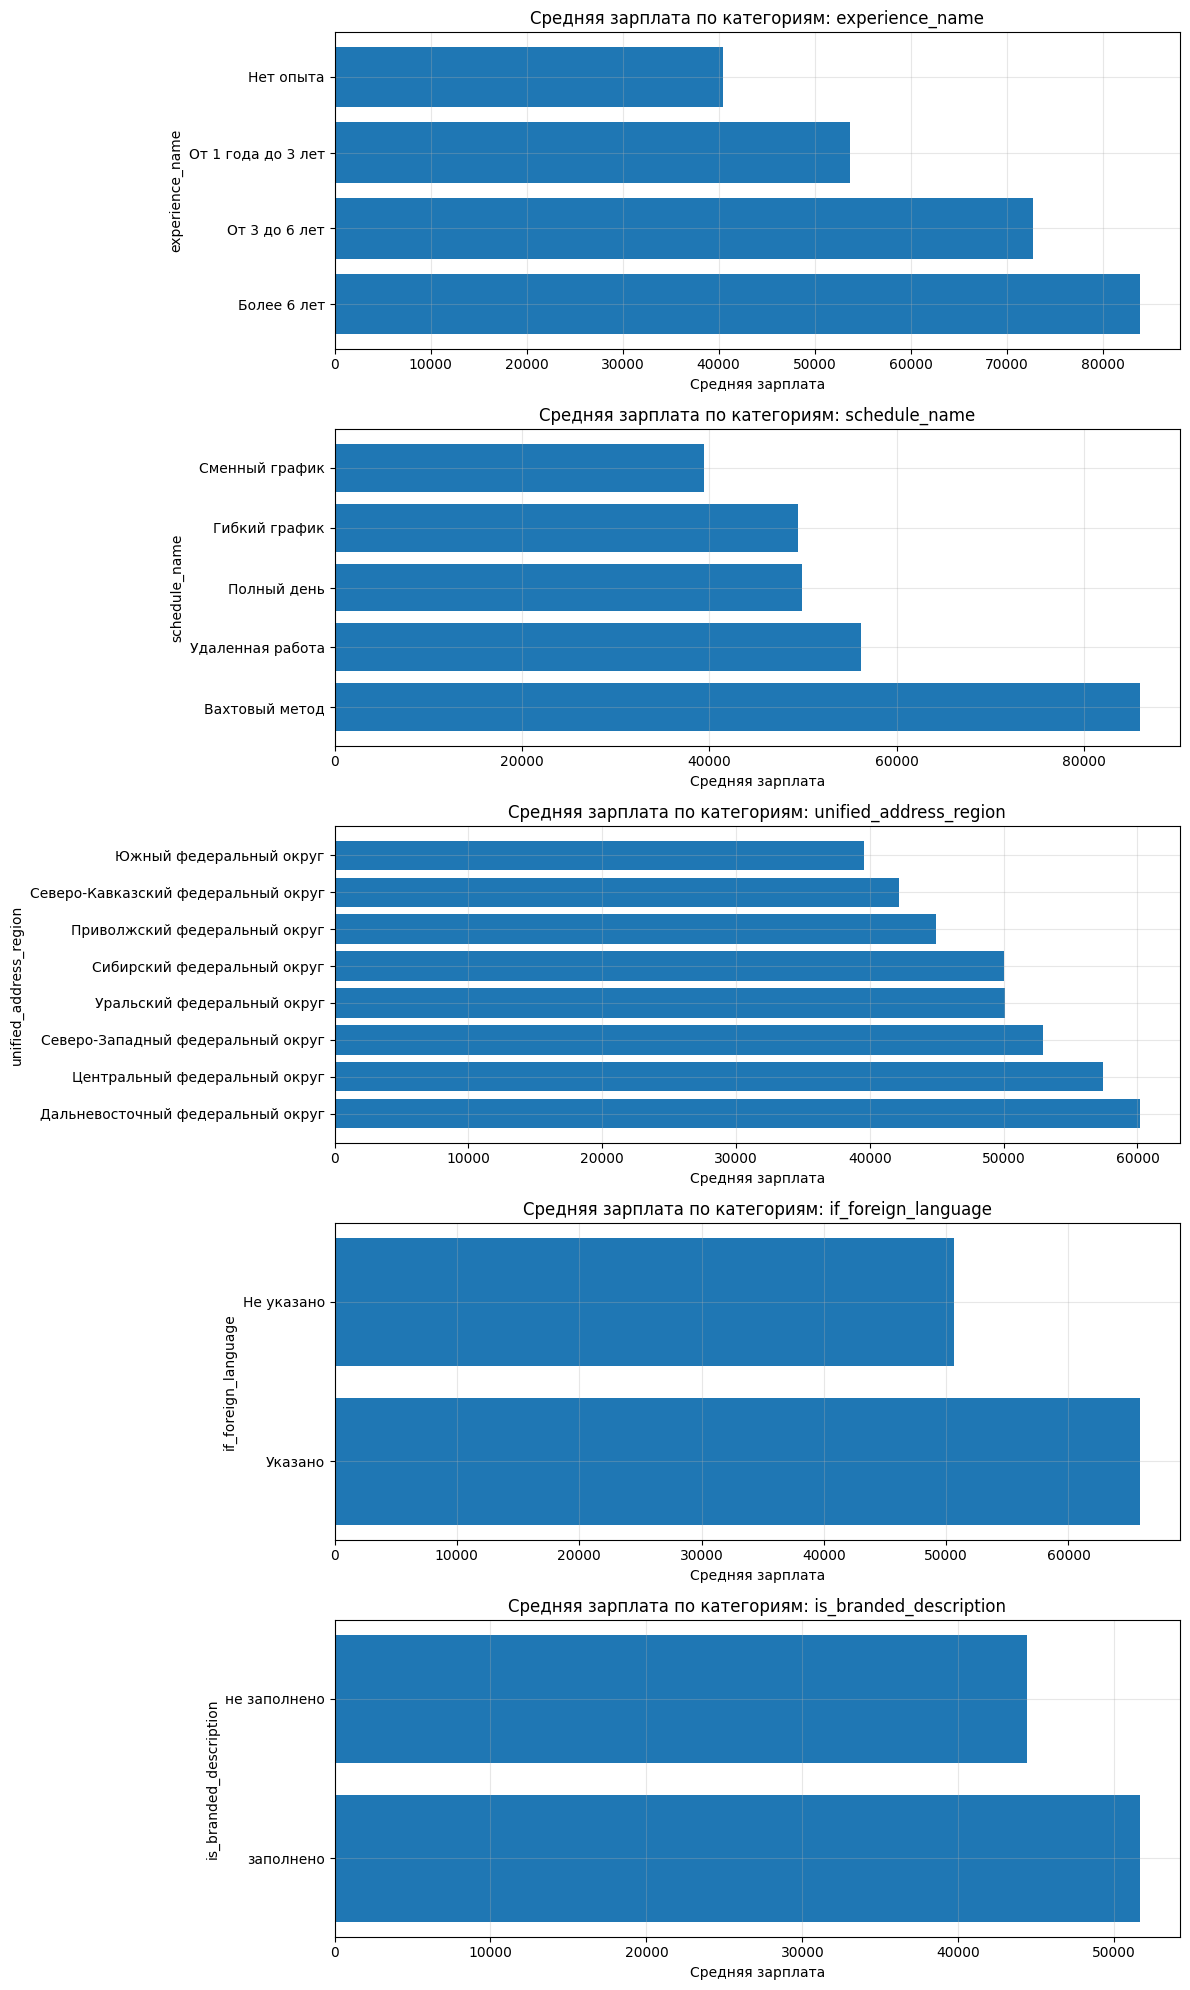

In [7]:
# Визуализация топ-5 наиболее значимых категориальных признаков
if len(results_df) > 0:
    top_features = results_df.head(5)['Признак'].tolist()
    
    fig, axes = plt.subplots(len(top_features), 1, figsize=(12, 4*len(top_features)))
    if len(top_features) == 1:
        axes = [axes]
    
    for idx, col in enumerate(top_features):
        temp_df = df[[col, 'salary_mean_net']].dropna()
        
        # Считаем статистику по категориям
        stats = temp_df.groupby(col)['salary_mean_net'].agg(['mean', 'count']).reset_index()
        stats = stats[stats['count'] >= 10]  # Только категории с достаточным количеством наблюдений
        stats = stats.sort_values('mean', ascending=False).head(15)  # Топ-15 категорий
        
        axes[idx].barh(stats[col].astype(str), stats['mean'])
        axes[idx].set_xlabel('Средняя зарплата')
        axes[idx].set_ylabel(col)
        axes[idx].set_title(f'Средняя зарплата по категориям: {col}')
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Анализ признаков с большим количеством уникальных значений


Для признаков с высокой кардинальностью используем **Target Encoding** и считаем корреляцию с таргетом


In [8]:
from sklearn.model_selection import KFold
import numpy as np

def target_encode_with_cv(data, column, target='salary_mean_net', n_splits=5, smoothing=10):
    """
    Target encoding с защитой от overfitting через cross-validation и smoothing
    
    Parameters:
    -----------
    data : DataFrame
        Исходные данные
    column : str
        Название колонки для encoding
    target : str
        Название целевой переменной
    n_splits : int
        Количество фолдов для CV
    smoothing : float
        Параметр сглаживания для редких категорий
    
    Returns:
    --------
    encoded : array
        Закодированные значения
    """
    # Убираем строки с пропусками в таргете
    mask = data[target].notna() & data[column].notna()
    data_clean = data[mask].copy()
    
    encoded = np.zeros(len(data_clean))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    global_mean = data_clean[target].mean()
    
    for train_idx, val_idx in kf.split(data_clean):
        # Считаем статистику на train
        train_data = data_clean.iloc[train_idx]
        val_data = data_clean.iloc[val_idx]
        
        # Target mean и count для каждой категории
        stats = train_data.groupby(column)[target].agg(['mean', 'count'])
        
        # Smoothing: (count * target_mean + smoothing * global_mean) / (count + smoothing)
        stats['smoothed_mean'] = (
            (stats['count'] * stats['mean'] + smoothing * global_mean) / 
            (stats['count'] + smoothing)
        )
        
        # Применяем к validation
        encoded[val_idx] = val_data[column].map(stats['smoothed_mean']).fillna(global_mean).values
    
    # Возвращаем полный массив с NaN для исходных пропусков
    result = np.full(len(data), np.nan)
    result[mask] = encoded
    
    return result

# Признаки с высокой кардинальностью для анализа
high_cardinality_features = [
    'key_skills_name',
    'unified_address_city',
    'unified_address_state',
    'professional_roles_name',
    'languages_name',
    'name_clean',
    'employer_industries'
]

# Анализируем каждый признак
results = []

for col in high_cardinality_features:
    if col not in df.columns:
        continue
    
    # Проверяем наличие данных
    n_valid = df[col].notna().sum()
    n_unique = df[col].nunique()
    
    if n_valid < 100:  # Слишком мало данных
        continue
    
    print(f"\nОбработка: {col}")
    print(f"  Уникальных значений: {n_unique}")
    print(f"  Заполненных строк: {n_valid}")
    
    # Target encoding
    encoded = target_encode_with_cv(df, col)
    
    # Корреляция с таргетом
    mask = ~np.isnan(encoded) & df['salary_mean_net'].notna()
    if mask.sum() > 0:
        correlation = np.corrcoef(encoded[mask], df.loc[mask, 'salary_mean_net'])[0, 1]
        
        results.append({
            'Признак': col,
            'Уникальных значений': n_unique,
            'Заполненных строк': n_valid,
            'Корреляция': correlation,
            'Abs корреляция': abs(correlation)
        })
        
        print(f"  Корреляция с зарплатой: {correlation:.4f}")

# Сортируем по абсолютной корреляции
results_df = pd.DataFrame(results).sort_values('Abs корреляция', ascending=False)
results_df = results_df.drop('Abs корреляция', axis=1)

print("\n" + "="*80)
print("Итоговая таблица: корреляция target-encoded признаков с зарплатой")
print("="*80)
print(results_df.to_string(index=False))



Обработка: key_skills_name
  Уникальных значений: 2599
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.3180

Обработка: unified_address_city
  Уникальных значений: 208
  Заполненных строк: 37571
  Корреляция с зарплатой: 0.3224

Обработка: unified_address_state
  Уникальных значений: 84
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.3271

Обработка: professional_roles_name
  Уникальных значений: 145
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.5018

Обработка: languages_name
  Уникальных значений: 40
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.0856

Обработка: name_clean
  Уникальных значений: 23319
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.4185

Обработка: employer_industries
  Уникальных значений: 248
  Заполненных строк: 49051
  Корреляция с зарплатой: 0.3003

Итоговая таблица: корреляция target-encoded признаков с зарплатой
                Признак  Уникальных значений  Заполненных строк  Корреляция
professional_roles_name           

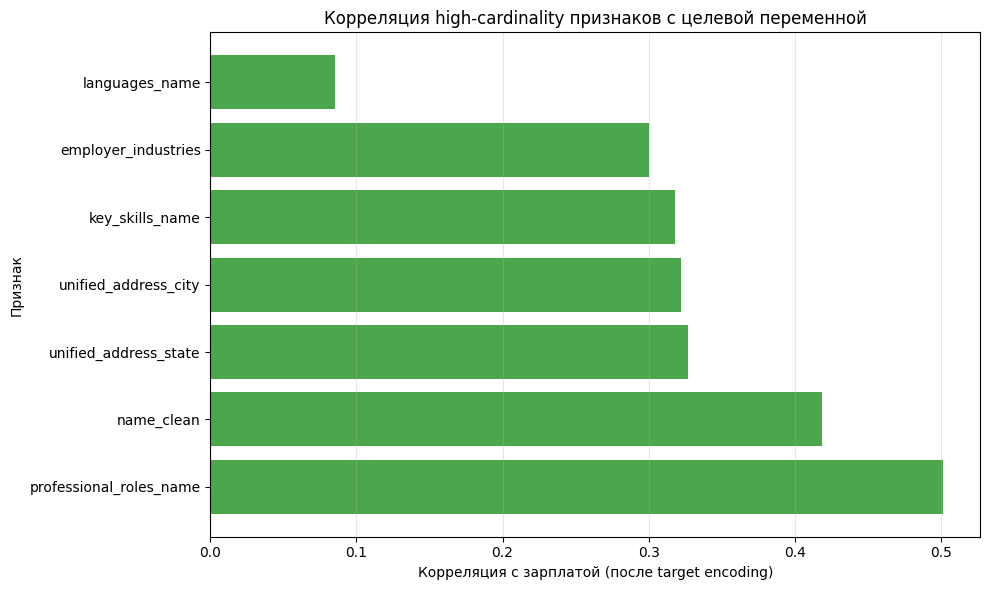


Интерпретация:
professional_roles_name                 : положительная  , сильная         связь (r=0.5018)
name_clean                              : положительная  , средняя         связь (r=0.4185)
unified_address_state                   : положительная  , средняя         связь (r=0.3271)
unified_address_city                    : положительная  , средняя         связь (r=0.3224)
key_skills_name                         : положительная  , средняя         связь (r=0.3180)
employer_industries                     : положительная  , средняя         связь (r=0.3003)
languages_name                          : положительная  , очень слабая    связь (r=0.0856)


In [9]:
# Визуализация корреляций high-cardinality признаков
if len(results_df) > 0:
    plt.figure(figsize=(10, 6))
    
    colors = ['green' if x > 0 else 'red' for x in results_df['Корреляция']]
    plt.barh(results_df['Признак'], results_df['Корреляция'], color=colors, alpha=0.7)
    plt.xlabel('Корреляция с зарплатой (после target encoding)')
    plt.ylabel('Признак')
    plt.title('Корреляция high-cardinality признаков с целевой переменной')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Дополнительная статистика
    print("\n" + "="*80)
    print("Интерпретация:")
    print("="*80)
    
    for idx, row in results_df.iterrows():
        corr = row['Корреляция']
        strength = ""
        if abs(corr) > 0.5:
            strength = "сильная"
        elif abs(corr) > 0.3:
            strength = "средняя"
        elif abs(corr) > 0.1:
            strength = "слабая"
        else:
            strength = "очень слабая"
        
        direction = "положительная" if corr > 0 else "отрицательная"
        
        print(f"{row['Признак']:40s}: {direction:15s}, {strength:15s} связь (r={corr:.4f})")


## Анализ влияния работодателя на зарплату


Исследуем как `employer_id` и связанные признаки влияют на уровень зарплаты

In [10]:
# 1. Target Encoding для employer_id и корреляция с зарплатой

print("="*80)
print("Анализ employer_id")
print("="*80)

# Статистика по работодателям
n_employers = df['employer_id'].nunique()
n_valid = df['employer_id'].notna().sum()

print("\nОбщая статистика:")
print(f"  Уникальных работодателей: {n_employers}")
print(f"  Вакансий с employer_id: {n_valid}")

# Target encoding
employer_encoded = target_encode_with_cv(df, 'employer_id')

# Корреляция
mask = ~np.isnan(employer_encoded) & df['salary_mean_net'].notna()
correlation = np.corrcoef(employer_encoded[mask], df.loc[mask, 'salary_mean_net'])[0, 1]

print(f"\nКорреляция target-encoded employer_id с зарплатой: {correlation:.4f}")

if abs(correlation) > 0.5:
    strength = "сильная"
elif abs(correlation) > 0.3:
    strength = "средняя"
elif abs(correlation) > 0.1:
    strength = "слабая"
else:
    strength = "очень слабая"

print(f"Оценка: {strength} связь")


Анализ employer_id

Общая статистика:
  Уникальных работодателей: 23913
  Вакансий с employer_id: 49009

Корреляция target-encoded employer_id с зарплатой: 0.4674
Оценка: средняя связь


In [11]:
# 2. Детальная статистика по работодателям

# Агрегируем статистику по каждому работодателю
employer_stats = df[df['employer_id'].notna()].groupby('employer_id').agg({
    'salary_mean_net': ['mean', 'median', 'std', 'count'],
    'employer_name': 'first',
    'employer_industries': 'first'
}).reset_index()

# Упрощаем названия колонок
employer_stats.columns = ['employer_id', 'mean_salary', 'median_salary', 'std_salary', 
                          'n_vacancies', 'employer_name', 'industry']

# Убираем работодателей с пропущенной зарплатой
employer_stats = employer_stats[employer_stats['mean_salary'].notna()]

# Коэффициент вариации (CV) - мера стабильности зарплат
employer_stats['cv'] = employer_stats['std_salary'] / employer_stats['mean_salary']

print("\n" + "="*80)
print("Общая статистика по работодателям:")
print("="*80)
print(f"Работодателей с данными о зарплатах: {len(employer_stats)}")
print(f"\nСреднее количество вакансий на работодателя: {employer_stats['n_vacancies'].mean():.1f}")
print(f"Медианное количество вакансий: {employer_stats['n_vacancies'].median():.1f}")
print(f"Максимальное количество вакансий у одного работодателя: {employer_stats['n_vacancies'].max()}")

# Распределение работодателей по размеру
print("\nРаспределение работодателей по количеству вакансий:")
print(f"  1 вакансия: {(employer_stats['n_vacancies'] == 1).sum()} работодателей")
print(f"  2-5 вакансий: {((employer_stats['n_vacancies'] >= 2) & (employer_stats['n_vacancies'] <= 5)).sum()}")
print(f"  6-20 вакансий: {((employer_stats['n_vacancies'] >= 6) & (employer_stats['n_vacancies'] <= 20)).sum()}")
print(f"  21-100 вакансий: {((employer_stats['n_vacancies'] >= 21) & (employer_stats['n_vacancies'] <= 100)).sum()}")
print(f"  100+ вакансий: {(employer_stats['n_vacancies'] > 100).sum()}")



Общая статистика по работодателям:
Работодателей с данными о зарплатах: 23913

Среднее количество вакансий на работодателя: 2.0
Медианное количество вакансий: 1.0
Максимальное количество вакансий у одного работодателя: 997

Распределение работодателей по количеству вакансий:
  1 вакансия: 18434 работодателей
  2-5 вакансий: 4563
  6-20 вакансий: 749
  21-100 вакансий: 138
  100+ вакансий: 29


In [12]:
# 3. Топ-20 работодателей по средней зарплате (минимум 10 вакансий)

print("\n" + "="*80)
print("Топ-20 работодателей по средней зарплате (минимум 10 вакансий)")
print("="*80)

top_salary_employers = employer_stats[employer_stats['n_vacancies'] >= 10].nlargest(20, 'mean_salary')

for idx, row in top_salary_employers.iterrows():
    print(f"\n{row['employer_name']}")
    print(f"  Средняя зарплата: {row['mean_salary']:,.0f} ₽")
    print(f"  Медианная зарплата: {row['median_salary']:,.0f} ₽")
    print(f"  Количество вакансий: {int(row['n_vacancies'])}")
    print(f"  Индустрия: {row['industry']}")
    if not pd.isna(row['std_salary']):
        print(f"  Разброс (std): {row['std_salary']:,.0f} ₽")



Топ-20 работодателей по средней зарплате (минимум 10 вакансий)

ОНИКС-Недвижимость
  Средняя зарплата: 143,777 ₽
  Медианная зарплата: 139,200 ₽
  Количество вакансий: 13
  Индустрия: агентские услуги в недвижимости
  Разброс (std): 31,171 ₽

Транзит
  Средняя зарплата: 127,895 ₽
  Медианная зарплата: 135,000 ₽
  Количество вакансий: 38
  Индустрия: порты
  Разброс (std): 16,259 ₽

НИТЭК
  Средняя зарплата: 121,384 ₽
  Медианная зарплата: 120,000 ₽
  Количество вакансий: 56
  Индустрия: порты
  Разброс (std): 11,200 ₽

ТрансСтрой
  Средняя зарплата: 120,250 ₽
  Медианная зарплата: 120,000 ₽
  Количество вакансий: 12
  Индустрия: строительство дорожное и инфраструктурное
  Разброс (std): 31,906 ₽

Строй-Стафф
  Средняя зарплата: 118,908 ₽
  Медианная зарплата: 134,000 ₽
  Количество вакансий: 13
  Индустрия: не указано
  Разброс (std): 24,805 ₽

НЕФТЕГАЗПРОМСТРОЙ
  Средняя зарплата: 118,704 ₽
  Медианная зарплата: 125,000 ₽
  Количество вакансий: 10
  Индустрия: не указано
  Разброс (s

In [13]:
# 4. Топ-20 работодателей по количеству вакансий

print("\n" + "="*80)
print("Топ-20 работодателей по количеству вакансий")
print("="*80)

top_volume_employers = employer_stats.nlargest(20, 'n_vacancies')

for idx, row in top_volume_employers.iterrows():
    print(f"\n{row['employer_name']}")
    print(f"  Количество вакансий: {int(row['n_vacancies'])}")
    print(f"  Средняя зарплата: {row['mean_salary']:,.0f} ₽")
    print(f"  Медианная зарплата: {row['median_salary']:,.0f} ₽")
    print(f"  Индустрия: {row['industry']}")



Топ-20 работодателей по количеству вакансий

Пятёрочка
  Количество вакансий: 997
  Средняя зарплата: 31,411 ₽
  Медианная зарплата: 27,840 ₽
  Индустрия: розничная сеть

МАГНИТ, Розничная сеть
  Количество вакансий: 377
  Средняя зарплата: 32,722 ₽
  Медианная зарплата: 28,275 ₽
  Индустрия: аксессуары

ГКУ КК Центр занятости населения города Анапа
  Количество вакансий: 355
  Средняя зарплата: 22,263 ₽
  Медианная зарплата: 17,400 ₽
  Индустрия: государственные организации

Яндекс
  Количество вакансий: 354
  Средняя зарплата: 33,266 ₽
  Медианная зарплата: 32,190 ₽
  Индустрия: платежные системы

Консалтинг Групп
  Количество вакансий: 344
  Средняя зарплата: 75,930 ₽
  Медианная зарплата: 77,000 ₽
  Индустрия: металлоконструкции

ГКУ КК ЦЗН города Новороссийска
  Количество вакансий: 277
  Средняя зарплата: 29,034 ₽
  Медианная зарплата: 30,450 ₽
  Индустрия: не указано

Перекресток, супермаркет
  Количество вакансий: 273
  Средняя зарплата: 31,308 ₽
  Медианная зарплата: 31,233 ₽

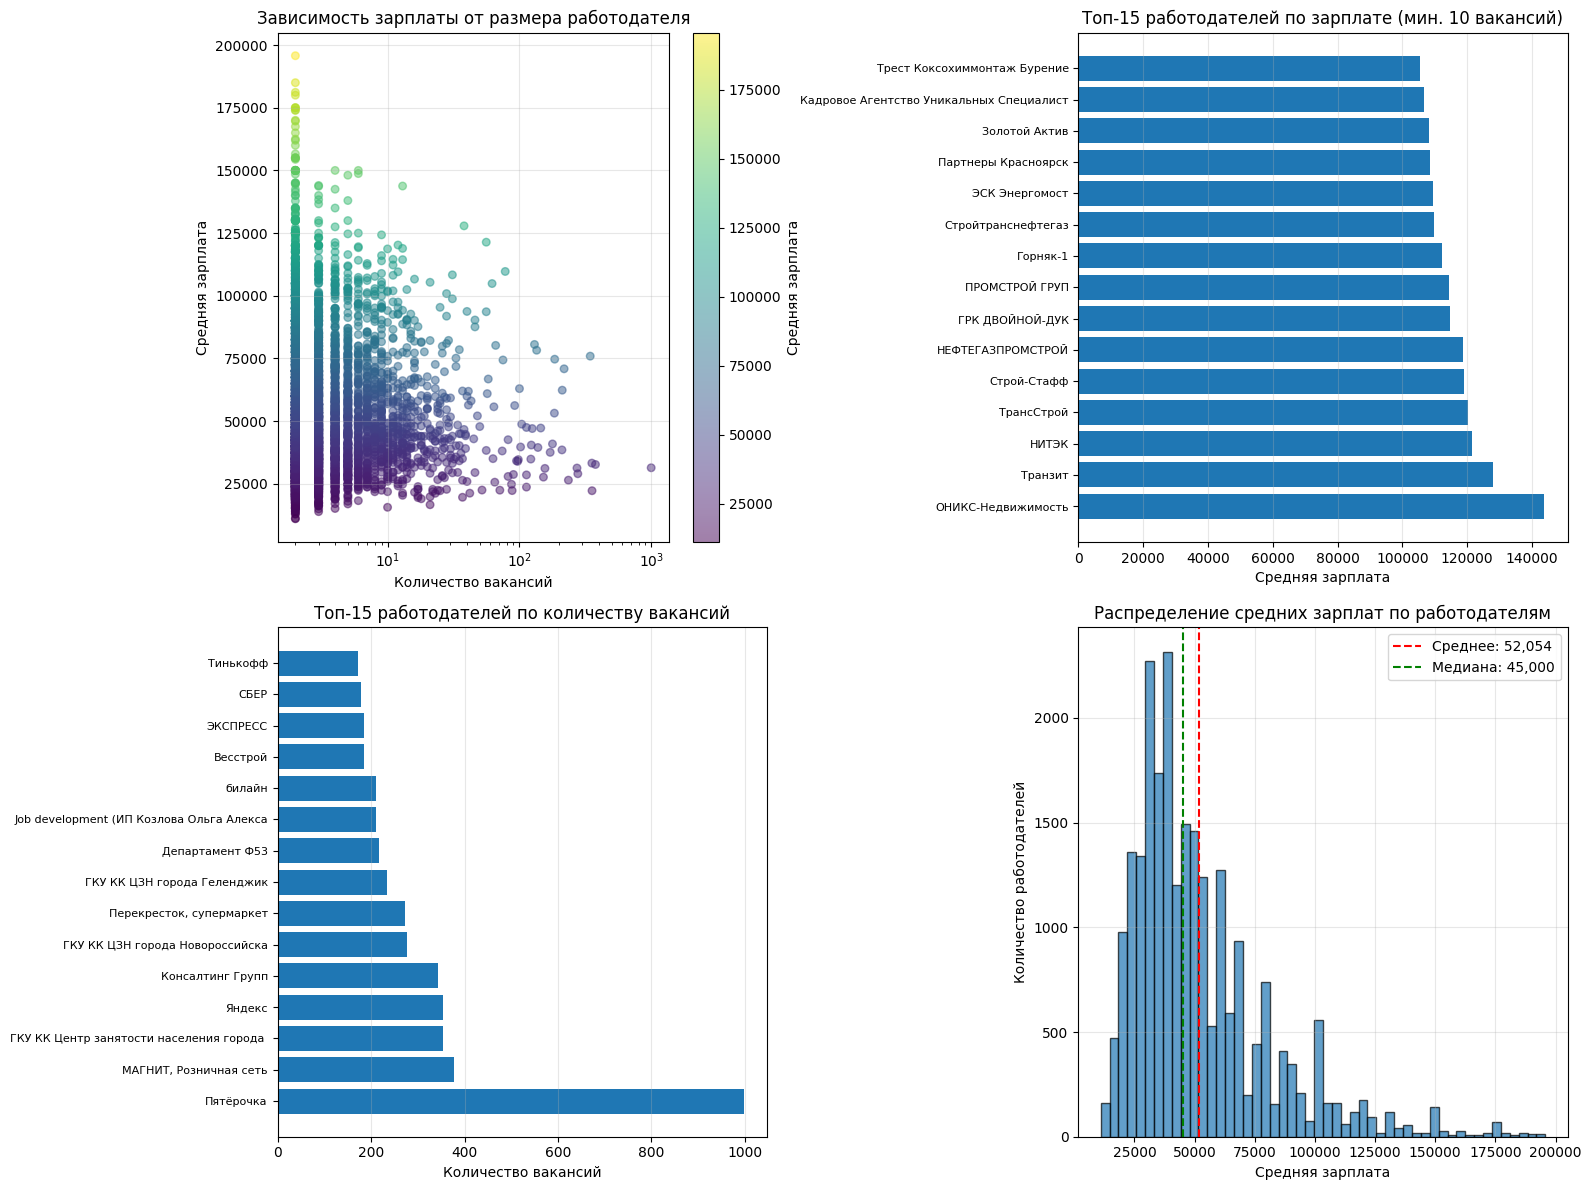

In [14]:
# 5. Визуализация: средняя зарплата vs количество вакансий

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Scatter plot - зарплата vs количество вакансий
ax1 = axes[0, 0]
# Фильтруем работодателей с минимум 2 вакансиями для лучшей визуализации
plot_data = employer_stats[employer_stats['n_vacancies'] >= 2]
scatter = ax1.scatter(plot_data['n_vacancies'], plot_data['mean_salary'], 
                     alpha=0.5, s=30, c=plot_data['mean_salary'], cmap='viridis')
ax1.set_xlabel('Количество вакансий')
ax1.set_ylabel('Средняя зарплата')
ax1.set_title('Зависимость зарплаты от размера работодателя')
ax1.set_xscale('log')
ax1.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Средняя зарплата')

# График 2: Топ-15 по зарплате
ax2 = axes[0, 1]
top_15_salary = employer_stats[employer_stats['n_vacancies'] >= 10].nlargest(15, 'mean_salary')
y_pos = np.arange(len(top_15_salary))
ax2.barh(y_pos, top_15_salary['mean_salary'])
ax2.set_yticks(y_pos)
ax2.set_yticklabels([name[:40] for name in top_15_salary['employer_name']], fontsize=8)
ax2.set_xlabel('Средняя зарплата')
ax2.set_title('Топ-15 работодателей по зарплате (мин. 10 вакансий)')
ax2.grid(alpha=0.3, axis='x')

# График 3: Топ-15 по количеству вакансий
ax3 = axes[1, 0]
top_15_volume = employer_stats.nlargest(15, 'n_vacancies')
y_pos = np.arange(len(top_15_volume))
ax3.barh(y_pos, top_15_volume['n_vacancies'])
ax3.set_yticks(y_pos)
ax3.set_yticklabels([name[:40] for name in top_15_volume['employer_name']], fontsize=8)
ax3.set_xlabel('Количество вакансий')
ax3.set_title('Топ-15 работодателей по количеству вакансий')
ax3.grid(alpha=0.3, axis='x')

# График 4: Распределение средних зарплат по работодателям
ax4 = axes[1, 1]
ax4.hist(employer_stats['mean_salary'], bins=50, edgecolor='black', alpha=0.7)
ax4.axvline(employer_stats['mean_salary'].mean(), color='red', linestyle='--', 
           label=f'Среднее: {employer_stats["mean_salary"].mean():,.0f}')
ax4.axvline(employer_stats['mean_salary'].median(), color='green', linestyle='--',
           label=f'Медиана: {employer_stats["mean_salary"].median():,.0f}')
ax4.set_xlabel('Средняя зарплата')
ax4.set_ylabel('Количество работодателей')
ax4.set_title('Распределение средних зарплат по работодателям')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# 6. Стабильность зарплат: работодатели с наименьшим разбросом

print("\n" + "="*80)
print("Работодатели с наиболее стабильными зарплатами")
print("(минимум 20 вакансий, низкий коэффициент вариации)")
print("="*80)

stable_employers = employer_stats[
    (employer_stats['n_vacancies'] >= 20) & 
    (employer_stats['cv'].notna())
].nsmallest(15, 'cv')

for idx, row in stable_employers.iterrows():
    print(f"\n{row['employer_name']}")
    print(f"  Средняя зарплата: {row['mean_salary']:,.0f} ₽")
    print(f"  Стандартное отклонение: {row['std_salary']:,.0f} ₽")
    print(f"  Коэффициент вариации: {row['cv']:.2%}")
    print(f"  Количество вакансий: {int(row['n_vacancies'])}")

print("\n" + "="*80)
print("Работодатели с наибольшим разбросом зарплат")
print("(минимум 20 вакансий, высокий коэффициент вариации)")
print("="*80)

unstable_employers = employer_stats[
    (employer_stats['n_vacancies'] >= 20) & 
    (employer_stats['cv'].notna())
].nlargest(15, 'cv')

for idx, row in unstable_employers.iterrows():
    print(f"\n{row['employer_name']}")
    print(f"  Средняя зарплата: {row['mean_salary']:,.0f} ₽")
    print(f"  Стандартное отклонение: {row['std_salary']:,.0f} ₽")
    print(f"  Коэффициент вариации: {row['cv']:.2%}")
    print(f"  Количество вакансий: {int(row['n_vacancies'])}")



Работодатели с наиболее стабильными зарплатами
(минимум 20 вакансий, низкий коэффициент вариации)

ФКУ ИК-18 УФСИН России по Ямало-Ненецкому автономному округу
  Средняя зарплата: 45,000 ₽
  Стандартное отклонение: 0 ₽
  Коэффициент вариации: 0.00%
  Количество вакансий: 36

Сургутский линейный отдел МВД России на транспорте
  Средняя зарплата: 46,110 ₽
  Стандартное отклонение: 0 ₽
  Коэффициент вариации: 0.00%
  Количество вакансий: 24

2 специальный полк полиции ГУ МВД РОССИИ по г. Москве
  Средняя зарплата: 62,976 ₽
  Стандартное отклонение: 2,059 ₽
  Коэффициент вариации: 3.27%
  Количество вакансий: 100

SVOЁ
  Средняя зарплата: 59,270 ₽
  Стандартное отклонение: 2,126 ₽
  Коэффициент вариации: 3.59%
  Количество вакансий: 30

Пункт отбора на военную службу по контракту по Чувашской Республике
  Средняя зарплата: 33,177 ₽
  Стандартное отклонение: 1,282 ₽
  Коэффициент вариации: 3.86%
  Количество вакансий: 31

Отдельный батальон патрульно-постовой службы полиции УМВД России по 


Средняя зарплата по индустриям (минимум 100 вакансий)


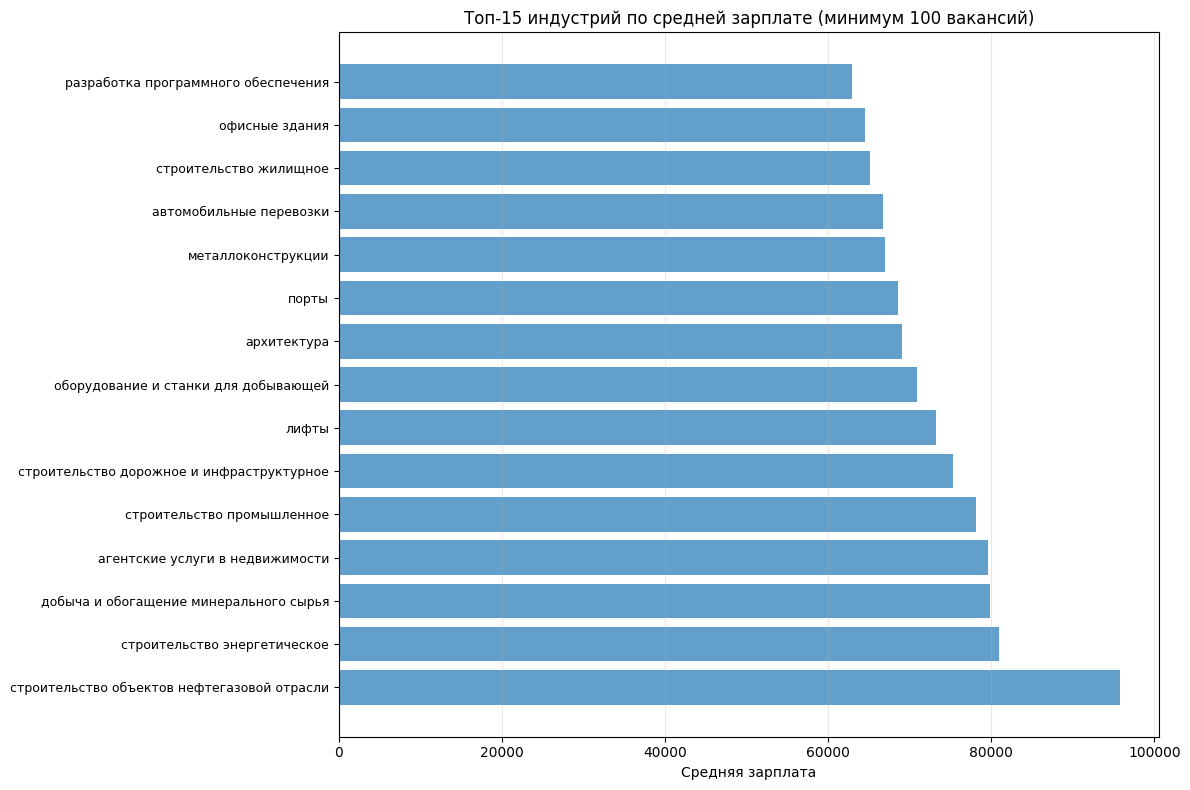


Топ-15 индустрий:

строительство объектов нефтегазовой отрасли
  Средняя зарплата: 95,770 ₽
  Медианная зарплата: 95,000 ₽
  Количество вакансий: 182

строительство энергетическое
  Средняя зарплата: 80,961 ₽
  Медианная зарплата: 84,187 ₽
  Количество вакансий: 128

добыча и обогащение минерального сырья
  Средняя зарплата: 79,808 ₽
  Медианная зарплата: 77,000 ₽
  Количество вакансий: 123

агентские услуги в недвижимости
  Средняя зарплата: 79,657 ₽
  Медианная зарплата: 70,000 ₽
  Количество вакансий: 329

строительство промышленное
  Средняя зарплата: 78,116 ₽
  Медианная зарплата: 80,000 ₽
  Количество вакансий: 193

строительство дорожное и инфраструктурное
  Средняя зарплата: 75,254 ₽
  Медианная зарплата: 70,000 ₽
  Количество вакансий: 258

лифты
  Средняя зарплата: 73,203 ₽
  Медианная зарплата: 71,000 ₽
  Количество вакансий: 246

оборудование и станки для добывающей
  Средняя зарплата: 70,875 ₽
  Медианная зарплата: 73,375 ₽
  Количество вакансий: 124

архитектура
  Средня

In [16]:
# 7. Связь индустрии работодателя с зарплатой

print("\n" + "="*80)
print("Средняя зарплата по индустриям (минимум 100 вакансий)")
print("="*80)

# Группируем по индустриям
industry_stats = df[
    (df['employer_industries'] != 'не указано') & 
    (df['employer_industries'].notna())
].groupby('employer_industries').agg({
    'salary_mean_net': ['mean', 'median', 'std', 'count']
}).reset_index()

industry_stats.columns = ['industry', 'mean_salary', 'median_salary', 'std_salary', 'n_vacancies']
industry_stats = industry_stats[industry_stats['mean_salary'].notna()]

# Фильтруем индустрии с достаточным количеством данных
industry_stats_filtered = industry_stats[industry_stats['n_vacancies'] >= 100]

# Топ-15 по зарплате
top_industries = industry_stats_filtered.nlargest(15, 'mean_salary')

plt.figure(figsize=(12, 8))
y_pos = np.arange(len(top_industries))
plt.barh(y_pos, top_industries['mean_salary'], alpha=0.7)
plt.yticks(y_pos, top_industries['industry'], fontsize=9)
plt.xlabel('Средняя зарплата')
plt.title('Топ-15 индустрий по средней зарплате (минимум 100 вакансий)')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nТоп-15 индустрий:")
for idx, row in top_industries.iterrows():
    print(f"\n{row['industry']}")
    print(f"  Средняя зарплата: {row['mean_salary']:,.0f} ₽")
    print(f"  Медианная зарплата: {row['median_salary']:,.0f} ₽")
    print(f"  Количество вакансий: {int(row['n_vacancies'])}")


In [18]:
# Детальный анализ топ-3 признаков
top_n = min(3, len(results_df))
if top_n > 0:
    top_features = results_df.head(top_n)['Признак'].tolist()
    
    print("\n" + "="*80)
    print(f"Детальный анализ топ-{top_n} признаков по корреляции")
    print("="*80)
    
    for col in top_features:
        print(f"\n{'='*80}")
        print(f"Признак: {col}")
        print('='*80)
        
        # Статистика по категориям
        stats = df[[col, 'salary_mean_net']].dropna().groupby(col)['salary_mean_net'].agg([
            ('Средняя ЗП', 'mean'),
            ('Медианная ЗП', 'median'),
            ('Кол-во вакансий', 'count'),
            ('Стд. откл.', 'std')
        ]).reset_index()
        
        # Топ-10 категорий по средней зарплате
        top_cats = stats.nlargest(10, 'Средняя ЗП')
        print("\nТоп-10 категорий по средней зарплате:")
        print(top_cats.to_string(index=False))
        
        # Худшие 10 категорий
        if len(stats) > 10:
            bottom_cats = stats.nsmallest(10, 'Средняя ЗП')
            print("\nХудшие 10 категорий по средней зарплате:")
            print(bottom_cats.to_string(index=False))



Детальный анализ топ-3 признаков по корреляции

Признак: professional_roles_name

Топ-10 категорий по средней зарплате:
                     professional_roles_name    Средняя ЗП  Медианная ЗП  Кол-во вакансий   Стд. откл.
директор по информационным технологиям (cio) 174000.000000      174000.0                1          NaN
                 коммерческий директор (cco) 110364.705882      108750.0               34 35997.322142
              руководитель группы разработки 104284.190244      104400.0               41 45540.362204
          руководитель строительного проекта 103460.659091      100000.0               44 38292.258038
                                      геолог 103442.918286       95000.0               35 46961.550547
                                 программист  96300.918092       95700.0              729 45796.558725
                 операционный директор (coo)  95400.000000      100000.0                5 11865.917579
                                 тестировщик  95163.964

## Извлечение зарплат из текстовых описаний


In [19]:
import re

# Функция для извлечения чисел из текста (потенциальные зарплаты)
def extract_salary_from_text(text):
    if pd.isna(text):
        return None
    
    # Паттерны для поиска зарплат
    # Ищем числа с разделителями (пробелы, запятые) или просто большие числа
    patterns = [
        r'(\d+[\s,]?\d+[\s,]?\d+)',  # числа вида 100 000 или 100,000
        r'(\d{5,})',  # числа от 10000 и выше
    ]
    
    numbers = []
    for pattern in patterns:
        matches = re.findall(pattern, str(text))
        for match in matches:
            # Убираем пробелы и запятые
            num_str = match.replace(' ', '').replace(',', '')
            try:
                num = int(num_str)
                # Фильтруем разумные зарплаты (от 10к до 1М)
                if 10000 <= num <= 1000000:
                    numbers.append(num)
            except:
                continue
    
    return numbers if numbers else None

# Колонки с текстовыми описаниями
text_columns = ['lemmaized_wo_stopwords_raw_description', 
                'lemmaized_wo_stopwords_raw_branded_description']

# Проверяем наличие зарплат в описаниях
for col in text_columns:
    if col in df.columns:
        print(f"\n{'='*60}")
        print(f"Анализ колонки: {col}")
        print('='*60)
        
        # Применяем извлечение
        df[f'{col}_salaries'] = df[col].apply(extract_salary_from_text)
        
        # Считаем статистику
        has_numbers = df[f'{col}_salaries'].notna().sum()
        total_valid = df[col].notna().sum()
        
        print(f"Описаний с числами: {has_numbers} из {total_valid} ({has_numbers/total_valid*100:.2f}%)")
        
        # Примеры найденных зарплат
        examples = df[df[f'{col}_salaries'].notna()][[col, f'{col}_salaries', 'salary_mean_net']].head(10)
        if len(examples) > 0:
            print("\nПримеры найденных чисел:")
            for idx, row in examples.iterrows():
                print(f"\nРеальная зарплата: {row['salary_mean_net']}")
                print(f"Найденные числа: {row[f'{col}_salaries']}")
                print(f"Текст (первые 200 символов): {str(row[col])[:200]}...")



Анализ колонки: lemmaized_wo_stopwords_raw_description
Описаний с числами: 11158 из 49051 (22.75%)

Примеры найденных чисел:

Реальная зарплата: 115275.0
Найденные числа: [45000, 70000, 70000, 45000, 70000]
Текст (первые 200 символов): зао биоагросервис признанный лидер рынок семя пропашной культура биопрепарат растениеводство рынок сзр средство защита растение компания входить топ 5 протяжение 17 год зао биоагросервис поставлять пр...

Реальная зарплата: 32500.0
Найденные числа: [35000, 20000, 20000]
Текст (первые 200 символов): обязанность организовывать работа филиал заключение договор поставщик тмц заключать сопровождать договор поставка согласовывать условие срок поставка тмц формировать контролировать график поставка тмц...

Реальная зарплата: 70000.0
Найденные числа: [90017]
Текст (первые 200 символов): стабильно развивающийся компания сеть магазин штофф требоваться торговый представитель обязанность контроль сбор дебиторский задолженность поиск развитие клиентский база проведе

# Предобработка данных для моделирования


Цель: подготовить train и test датасеты для обучения моделей регрессии

In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Загружаем train и test данные
train_df = pd.read_csv("train_split.tsv", sep="\t")
test_df = pd.read_csv("test_split.tsv", sep="\t")

print(f"Train размер: {train_df.shape}")
print(f"Test размер: {test_df.shape}")
print(f"\nКолонки в train: {train_df.shape[1]}")
print(f"Колонки в test: {test_df.shape[1]}")

# Сохраняем копии для предобработки
train_processed = train_df.copy()
test_processed = test_df.copy()


Train размер: (49051, 28)
Test размер: (12263, 28)

Колонки в train: 28
Колонки в test: 28


## Удаление колонок с пропусками ≥50%


In [21]:
# Статистика по пропускам в train
missing_stats = pd.DataFrame({
    'Колонка': train_processed.columns,
    'Пропуски': train_processed.isnull().sum(),
    'Процент пропусков': (train_processed.isnull().sum() / len(train_processed) * 100).round(2)
})
missing_stats = missing_stats[missing_stats['Пропуски'] > 0].sort_values('Процент пропусков', ascending=False)

print("Статистика по пропускам:")
print(missing_stats.to_string(index=False))

# Удаляем колонки с пропусками ≥50%
cols_to_drop_missing = missing_stats[missing_stats['Процент пропусков'] >= 50]['Колонка'].tolist()
print(f"\nУдаляем колонки с пропусками ≥50%: {cols_to_drop_missing}")

train_processed = train_processed.drop(columns=cols_to_drop_missing)
test_processed = test_processed.drop(columns=cols_to_drop_missing, errors='ignore')

print(f"\nПосле удаления: train {train_processed.shape}, test {test_processed.shape}")


Статистика по пропускам:
                                                Колонка  Пропуски  Процент пропусков
lemmaized_wo_stopwords_raw_branded_description_salaries     47681              97.21
                                raw_branded_description     45090              91.92
         lemmaized_wo_stopwords_raw_branded_description     45090              91.92
        lemmaized_wo_stopwords_raw_description_salaries     37893              77.25
                                   unified_address_city     11480              23.40
                                            employer_id        42               0.09
                                 unified_address_region         6               0.01

Удаляем колонки с пропусками ≥50%: ['lemmaized_wo_stopwords_raw_branded_description_salaries', 'raw_branded_description', 'lemmaized_wo_stopwords_raw_branded_description', 'lemmaized_wo_stopwords_raw_description_salaries']

После удаления: train (49051, 24), test (12263, 24)


## Извлечение чисел из текста (до удаления текстовых колонок)


In [22]:
import re

def extract_first_number_from_text(text):
    """Извлекает первое число из текста (от 10000 до 1000000)"""
    if pd.isna(text):
        return None
    
    # Паттерны для поиска зарплат
    patterns = [
        r'(\d+[\s,]?\d+[\s,]?\d+)',  # числа вида 100 000 или 100,000
        r'(\d{5,})',  # числа от 10000 и выше
    ]
    
    for pattern in patterns:
        matches = re.findall(pattern, str(text))
        for match in matches:
            # Убираем пробелы и запятые
            num_str = match.replace(' ', '').replace(',', '')
            try:
                num = int(num_str)
                # Фильтруем разумные зарплаты (от 10к до 1М)
                if 10000 <= num <= 1000000:
                    return num
            except:
                continue
    
    return None

# Извлекаем первое число из текстовых описаний
text_columns = ['raw_description', 'lemmaized_wo_stopwords_raw_description']

for col in text_columns:
    if col in train_processed.columns:
        print(f"Извлечение чисел из {col}...")
        train_processed[f'{col}_first_number'] = train_processed[col].apply(extract_first_number_from_text)
        test_processed[f'{col}_first_number'] = test_processed[col].apply(extract_first_number_from_text)
        
        # Создаем общий признак (берем первое непустое значение)
        if col == text_columns[0]:
            train_processed['first_number_from_description'] = train_processed[f'{col}_first_number']
            test_processed['first_number_from_description'] = test_processed[f'{col}_first_number']
        else:
            # Заполняем пропуски из второй колонки
            train_processed['first_number_from_description'] = train_processed['first_number_from_description'].fillna(
                train_processed[f'{col}_first_number']
            )
            test_processed['first_number_from_description'] = test_processed['first_number_from_description'].fillna(
                test_processed[f'{col}_first_number']
            )

# Удаляем промежуточные колонки
for col in text_columns:
    if f'{col}_first_number' in train_processed.columns:
        train_processed = train_processed.drop(columns=[f'{col}_first_number'])
        test_processed = test_processed.drop(columns=[f'{col}_first_number'], errors='ignore')

print("\nИзвлечено чисел из описаний:")
print(f"Train: {train_processed['first_number_from_description'].notna().sum()} из {len(train_processed)}")
print(f"Test: {test_processed['first_number_from_description'].notna().sum()} из {len(test_processed)}")


Извлечение чисел из raw_description...
Извлечение чисел из lemmaized_wo_stopwords_raw_description...

Извлечено чисел из описаний:
Train: 11793 из 49051
Test: 2966 из 12263


## Удаление текстовых колонок


In [23]:
# Список текстовых колонок для удаления
text_cols_to_drop = [
    'raw_description',
    'raw_branded_description',
    'lemmaized_wo_stopwords_raw_description',
    'lemmaized_wo_stopwords_raw_branded_description',
    'name_clean',
    'employer_name'
]

# Удаляем только те, которые есть в датасете
cols_to_drop = [col for col in text_cols_to_drop if col in train_processed.columns]
print(f"Удаляем текстовые колонки: {cols_to_drop}")

train_processed = train_processed.drop(columns=cols_to_drop)
test_processed = test_processed.drop(columns=cols_to_drop, errors='ignore')

print(f"\nПосле удаления текстовых колонок: train {train_processed.shape}, test {test_processed.shape}")


Удаляем текстовые колонки: ['raw_description', 'lemmaized_wo_stopwords_raw_description', 'name_clean', 'employer_name']

После удаления текстовых колонок: train (49051, 21), test (12263, 21)


## Создание признаков на основе работодателя и региона (только на train данных!)


In [24]:
# Функция для создания признаков на основе работодателя
def create_employer_features(train_df, test_df, target_col='salary_mean_net', noise_std=0.1, random_state=42):
    """
    Создает признаки на основе работодателя.
    Все статистики вычисляются только на train, затем применяются к test.
    """
    np.random.seed(random_state)
    
    # Вычисляем статистики по работодателям на train
    employer_stats = train_df[train_df['employer_id'].notna()].groupby('employer_id').agg({
        target_col: ['mean', 'std', 'count']
    }).reset_index()
    
    employer_stats.columns = ['employer_id', 'employer_mean_salary', 'employer_std_salary', 'employer_vacancy_count']
    
    # Глобальное среднее для новых работодателей
    global_mean = train_df[target_col].mean()
    global_std = train_df[target_col].std()
    
    # Добавляем признаки в train
    train_df = train_df.merge(employer_stats, on='employer_id', how='left')
    
    # Добавляем шум к признакам, основанным на target (только для train)
    train_df['employer_mean_salary'] = train_df['employer_mean_salary'].fillna(global_mean)
    train_df['employer_std_salary'] = train_df['employer_std_salary'].fillna(0)
    
    # Добавляем случайный шум
    noise = np.random.normal(0, noise_std * global_std, len(train_df))
    train_df['employer_mean_salary'] = train_df['employer_mean_salary'] + noise
    
    # Заполняем пропуски
    train_df['employer_vacancy_count'] = train_df['employer_vacancy_count'].fillna(0)
    
    # Применяем к test (без шума, используем статистики из train)
    test_df = test_df.merge(employer_stats, on='employer_id', how='left')
    test_df['employer_mean_salary'] = test_df['employer_mean_salary'].fillna(global_mean)
    test_df['employer_std_salary'] = test_df['employer_std_salary'].fillna(0)
    test_df['employer_vacancy_count'] = test_df['employer_vacancy_count'].fillna(0)
    
    return train_df, test_df

# Функция для создания признаков на основе региона
def create_region_features(train_df, test_df, target_col='salary_mean_net', noise_std=0.1, random_state=42):
    """
    Создает признаки на основе региона.
    Все статистики вычисляются только на train, затем применяются к test.
    """
    np.random.seed(random_state)
    
    # Вычисляем статистики по регионам на train
    region_stats = train_df[train_df['unified_address_region'].notna()].groupby('unified_address_region').agg({
        target_col: 'mean'
    }).reset_index()
    
    region_stats.columns = ['unified_address_region', 'region_mean_salary']
    
    # Глобальное среднее для новых регионов
    global_mean = train_df[target_col].mean()
    global_std = train_df[target_col].std()
    
    # Добавляем признаки в train
    train_df = train_df.merge(region_stats, on='unified_address_region', how='left')
    train_df['region_mean_salary'] = train_df['region_mean_salary'].fillna(global_mean)
    
    # Добавляем случайный шум (только для train)
    noise = np.random.normal(0, noise_std * global_std, len(train_df))
    train_df['region_mean_salary'] = train_df['region_mean_salary'] + noise
    
    # Применяем к test (без шума, используем статистики из train)
    test_df = test_df.merge(region_stats, on='unified_address_region', how='left')
    test_df['region_mean_salary'] = test_df['region_mean_salary'].fillna(global_mean)
    
    return train_df, test_df

# Создаем признаки на основе работодателя
if 'employer_id' in train_processed.columns:
    print("Создание признаков на основе работодателя...")
    train_processed, test_processed = create_employer_features(
        train_processed, test_processed, 
        target_col='salary_mean_net', 
        noise_std=0.1
    )
    print("✓ Признаки работодателя созданы")

# Создаем признаки на основе региона
if 'unified_address_region' in train_processed.columns:
    print("\nСоздание признаков на основе региона...")
    train_processed, test_processed = create_region_features(
        train_processed, test_processed,
        target_col='salary_mean_net',
        noise_std=0.1
    )
    print("✓ Признаки региона созданы")

print(f"\nПосле создания признаков: train {train_processed.shape}, test {test_processed.shape}")


Создание признаков на основе работодателя...
✓ Признаки работодателя созданы

Создание признаков на основе региона...
✓ Признаки региона созданы

После создания признаков: train (49051, 25), test (12263, 25)


## Target Encoding для высококардинальных признаков (с шумом и фильтрацией)


In [25]:
from sklearn.model_selection import KFold
def target_encode_with_cv_noise(train_df, test_df, column, target='salary_mean_net', 
                                 min_samples=100, n_splits=5, smoothing=10, 
                                 noise_std=0.1, random_state=42):
    """
    Target encoding с защитой от утечки через cross-validation, случайным шумом
    и фильтрацией категорий по минимальному размеру группы.
    
    Parameters:
    -----------
    train_df : DataFrame
        Обучающая выборка
    test_df : DataFrame
        Тестовая выборка
    column : str
        Название колонки для encoding
    target : str
        Название целевой переменной
    min_samples : int
        Минимальное количество наблюдений в категории (по умолчанию 100)
    n_splits : int
        Количество фолдов для CV
    smoothing : float
        Параметр сглаживания для редких категорий
    noise_std : float
        Стандартное отклонение шума (относительно std(target))
    random_state : int
        Seed для воспроизводимости
    
    Returns:
    --------
    train_df, test_df : DataFrames
        Датафреймы с добавленным encoded признаком
    """
    np.random.seed(random_state)
    
    # Убираем строки с пропусками в таргете и колонке
    train_mask = train_df[target].notna() & train_df[column].notna()
    train_clean = train_df[train_mask].copy()
    
    if len(train_clean) == 0:
        print(f"  Предупреждение: нет данных для {column}")
        return train_df, test_df
    
    # Проверяем размер каждой категории
    category_counts = train_clean[column].value_counts()
    valid_categories = category_counts[category_counts >= min_samples].index.tolist()
    
    if len(valid_categories) == 0:
        print(f"  Предупреждение: нет категорий с ≥{min_samples} наблюдениями для {column}")
        # Используем глобальное среднее для всех
        global_mean = train_clean[target].mean()
        train_df[f'{column}_encoded'] = global_mean
        test_df[f'{column}_encoded'] = global_mean
        return train_df, test_df
    
    print(f"  Категорий с ≥{min_samples} наблюдениями: {len(valid_categories)} из {category_counts.shape[0]}")
    
    # Группируем редкие категории в "other"
    train_clean[column] = train_clean[column].apply(
        lambda x: x if x in valid_categories else 'other'
    )
    
    # Глобальное среднее
    global_mean = train_clean[target].mean()
    global_std = train_clean[target].std()
    
    # Target encoding с cross-validation
    encoded_train = np.zeros(len(train_clean))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for train_idx, val_idx in kf.split(train_clean):
        train_fold = train_clean.iloc[train_idx]
        val_fold = train_clean.iloc[val_idx]
        
        # Считаем статистику на train fold
        stats = train_fold.groupby(column)[target].agg(['mean', 'count'])
        
        # Smoothing
        stats['smoothed_mean'] = (
            (stats['count'] * stats['mean'] + smoothing * global_mean) / 
            (stats['count'] + smoothing)
        )
        
        # Применяем к validation fold
        encoded_train[val_idx] = val_fold[column].map(stats['smoothed_mean']).fillna(global_mean).values
    
    # Добавляем случайный шум
    noise = np.random.normal(0, noise_std * global_std, len(encoded_train))
    encoded_train = encoded_train + noise
    
    # Создаем mapping для применения к test
    # Используем полный train для создания финального mapping
    full_stats = train_clean.groupby(column)[target].agg(['mean', 'count'])
    full_stats['smoothed_mean'] = (
        (full_stats['count'] * full_stats['mean'] + smoothing * global_mean) / 
        (full_stats['count'] + smoothing)
    )
    
    # Добавляем encoded признак в train
    train_df[f'{column}_encoded'] = np.nan
    train_df.loc[train_mask, f'{column}_encoded'] = encoded_train
    train_df[f'{column}_encoded'] = train_df[f'{column}_encoded'].fillna(global_mean)
    
    # Применяем к test (без шума, используем статистики из train)
    test_df[f'{column}_encoded'] = test_df[column].apply(
        lambda x: full_stats.loc[x, 'smoothed_mean'] if x in full_stats.index else global_mean
    )
    
    return train_df, test_df

# Определяем высококардинальные признаки для target encoding
high_cardinality_features = [
    'employer_id',
    'professional_roles_name',
    'key_skills_name',
    'unified_address_state',
    'employer_industries'
    "unified_address_city"
]

# Применяем target encoding
print("Применение target encoding для высококардинальных признаков:")
print("=" * 60)

for col in high_cardinality_features:
    if col in train_processed.columns:
        print(f"\nОбработка: {col}")
        train_processed, test_processed = target_encode_with_cv_noise(
            train_processed, test_processed, 
            column=col,
            target='salary_mean_net',
            min_samples=100,
            n_splits=5,
            smoothing=10,
            noise_std=0.1,
            random_state=42
        )
        print("  ✓ Target encoding применен")

print(f"\nПосле target encoding: train {train_processed.shape}, test {test_processed.shape}")


Применение target encoding для высококардинальных признаков:

Обработка: employer_id
  Категорий с ≥100 наблюдениями: 30 из 23913
  ✓ Target encoding применен

Обработка: professional_roles_name
  Категорий с ≥100 наблюдениями: 89 из 145
  ✓ Target encoding применен

Обработка: key_skills_name
  Категорий с ≥100 наблюдениями: 70 из 2599
  ✓ Target encoding применен

Обработка: unified_address_state
  Категорий с ≥100 наблюдениями: 67 из 84
  ✓ Target encoding применен

После target encoding: train (49051, 29), test (12263, 29)


## Удаление исходных высококардинальных колонок и One-Hot Encoding для низкокардинальных признаков


In [26]:
# Удаляем исходные высококардинальные колонки (оставляем только encoded версии)
cols_to_drop_after_encoding = [col for col in high_cardinality_features 
                                if col in train_processed.columns and f'{col}_encoded' in train_processed.columns]

print(f"Удаляем исходные высококардинальные колонки: {cols_to_drop_after_encoding}")
train_processed = train_processed.drop(columns=cols_to_drop_after_encoding)
test_processed = test_processed.drop(columns=cols_to_drop_after_encoding, errors='ignore')

# Определяем низкокардинальные категориальные признаки для one-hot encoding
low_cardinality_features = [
    'experience_name', 'schedule_name', 'employment_name', 'unified_address_region',
    'if_foreign_language', 'is_branded_description', 'accept_kids', 
    'accept_handicapped',
]

low_cardinality_features = [col for col in low_cardinality_features if col in train_processed.columns]

print(f"\nПрименение one-hot encoding для {len(low_cardinality_features)} признаков")

# Применяем one-hot encoding через pandas get_dummies
for col in low_cardinality_features:
    # Заполняем пропуски перед encoding
    train_processed[col] = train_processed[col].fillna('unknown')
    test_processed[col] = test_processed[col].fillna('unknown')
    
    # One-hot encoding с drop_first
    train_dummies = pd.get_dummies(train_processed[col], prefix=col, drop_first=True)
    test_dummies = pd.get_dummies(test_processed[col], prefix=col, drop_first=True)
    
    # Выравниваем колонки (test может не иметь некоторых категорий)
    for dummy_col in train_dummies.columns:
        if dummy_col not in test_dummies.columns:
            test_dummies[dummy_col] = 0
    
    # Удаляем лишние колонки из test
    test_dummies = test_dummies[[col for col in train_dummies.columns]]
    
    # Добавляем encoded колонки
    train_processed = pd.concat([train_processed, train_dummies], axis=1)
    test_processed = pd.concat([test_processed, test_dummies], axis=1)
    
    # Удаляем исходную колонку
    train_processed = train_processed.drop(columns=[col])
    test_processed = test_processed.drop(columns=[col], errors='ignore')
    
    print(f"  ✓ {col}: создано {len(train_dummies.columns)} one-hot признаков")

print(f"\nПосле one-hot encoding: train {train_processed.shape}, test {test_processed.shape}")


Удаляем исходные высококардинальные колонки: ['employer_id', 'professional_roles_name', 'key_skills_name', 'unified_address_state']

Применение one-hot encoding для 8 признаков


  ✓ experience_name: создано 3 one-hot признаков
  ✓ schedule_name: создано 4 one-hot признаков
  ✓ employment_name: создано 4 one-hot признаков
  ✓ unified_address_region: создано 8 one-hot признаков
  ✓ if_foreign_language: создано 1 one-hot признаков
  ✓ is_branded_description: создано 1 one-hot признаков
  ✓ accept_kids: создано 1 one-hot признаков
  ✓ accept_handicapped: создано 1 one-hot признаков

После one-hot encoding: train (49051, 40), test (12263, 40)


## Создание бинарных признаков и обработка пропусков


In [27]:
# Создаем бинарные признаки (проверяем исходные данные)
if 'professional_roles_name' in train_df.columns:
    train_processed['has_professional_role'] = train_df['professional_roles_name'].notna().astype(int)
    test_processed['has_professional_role'] = test_df['professional_roles_name'].notna().astype(int)

if 'key_skills_name' in train_df.columns:
    train_processed['has_key_skills'] = train_df['key_skills_name'].notna().astype(int)
    test_processed['has_key_skills'] = test_df['key_skills_name'].notna().astype(int)

# Обработка пропусков в числовых признаках (статистики только на train)
print("\nОбработка пропусков в числовых признаках:")
numerical_cols = train_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'salary_mean_net' and col != 'id']

for col in numerical_cols:
    if train_processed[col].isnull().sum() > 0:
        # Вычисляем медиану на train
        median_value = train_processed[col].median()
        train_processed[col] = train_processed[col].fillna(median_value)
        test_processed[col] = test_processed[col].fillna(median_value)
        print(f"  ✓ {col}: заполнено медианой ({median_value:.2f})")

# Обработка пропусков в категориальных признаках (если остались)
categorical_cols = train_processed.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'id']

for col in categorical_cols:
    if train_processed[col].isnull().sum() > 0:
        # Вычисляем моду на train
        mode_value = train_processed[col].mode()[0] if len(train_processed[col].mode()) > 0 else 'unknown'
        train_processed[col] = train_processed[col].fillna(mode_value)
        test_processed[col] = test_processed[col].fillna(mode_value)
        print(f"  ✓ {col}: заполнено модой ({mode_value})")

print(f"\nПосле обработки пропусков: train {train_processed.shape}, test {test_processed.shape}")



Обработка пропусков в числовых признаках:
  ✓ first_number_from_description: заполнено медианой (41202.00)
  ✓ unified_address_city: заполнено модой (Москва)

После обработки пропусков: train (49051, 42), test (12263, 42)


## Финальная очистка и сохранение результатов


In [28]:
# Убеждаемся, что целевая переменная присутствует
assert 'salary_mean_net' in train_processed.columns, "Целевая переменная отсутствует в train!"
assert 'salary_mean_net' in test_processed.columns, "Целевая переменная отсутствует в test!"

# Выравниваем колонки train и test (на случай, если в test есть лишние колонки)
# Оставляем все колонки из train, добавляем недостающие в test (заполненные нулями или средними)
common_cols = [col for col in train_processed.columns if col != 'salary_mean_net' and col in test_processed.columns]
target_col = 'salary_mean_net'

# Колонки, которые есть в train, но отсутствуют в test
missing_in_test = [col for col in train_processed.columns if col not in test_processed.columns and col != target_col]

# Добавляем недостающие колонки в test (заполняем нулями или средними значениями)
for col in missing_in_test:
    if train_processed[col].dtype in [np.int64, np.float64]:
        # Для числовых - среднее значение
        test_processed[col] = train_processed[col].mean()
    else:
        # Для категориальных - первое значение или 0
        test_processed[col] = 0

# Упорядочиваем колонки одинаково
all_cols = [col for col in train_processed.columns if col != target_col] + [target_col]
train_processed = train_processed[all_cols]
test_processed = test_processed[all_cols]

# Финальная статистика
print("=" * 80)
print("ФИНАЛЬНАЯ СТАТИСТИКА ПО ПРЕДОБРАБОТАННЫМ ДАННЫМ")
print("=" * 80)

print("\nTrain датасет:")
print(f"  Размер: {train_processed.shape[0]} строк, {train_processed.shape[1]} колонок")
print(f"  Пропуски: {train_processed.isnull().sum().sum()}")

print("\nTest датасет:")
print(f"  Размер: {test_processed.shape[0]} строк, {test_processed.shape[1]} колонок")
print(f"  Пропуски: {test_processed.isnull().sum().sum()}")

print("\nТипы данных в train:")
print(train_processed.dtypes.value_counts())

print("\nПримеры колонок:")
print(f"  Числовые: {[col for col in train_processed.select_dtypes(include=[np.number]).columns[:5]]}")
print(f"  Категориальные: {[col for col in train_processed.select_dtypes(include=['object']).columns[:5] if col != 'id']}")

# Сохраняем предобработанные датасеты
print("\n" + "=" * 80)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("=" * 80)

train_processed.to_csv('train_processed.tsv', sep='\t', index=False)
test_processed.to_csv('test_processed.tsv', sep='\t', index=False)

print("\n✓ Предобработанные датасеты сохранены:")
print("  - train_processed.tsv")
print("  - test_processed.tsv")

print("\n✓ Предобработка завершена успешно!")


ФИНАЛЬНАЯ СТАТИСТИКА ПО ПРЕДОБРАБОТАННЫМ ДАННЫМ

Train датасет:
  Размер: 49051 строк, 42 колонок
  Пропуски: 0

Test датасет:
  Размер: 12263 строк, 42 колонок
  Пропуски: 0

Типы данных в train:
bool       23
float64    10
object      6
int64       3
Name: count, dtype: int64

Примеры колонок:
  Числовые: ['id', 'first_number_from_description', 'employer_mean_salary', 'employer_std_salary', 'employer_vacancy_count']
  Категориальные: ['name', 'unified_address_city', 'unified_address_country', 'specializations_profarea_name', 'languages_name']

СОХРАНЕНИЕ РЕЗУЛЬТАТОВ

✓ Предобработанные датасеты сохранены:
  - train_processed.tsv
  - test_processed.tsv

✓ Предобработка завершена успешно!


# Обучение и сравнение моделей

Цель: сравнить производительность различных моделей регрессии из sklearn для выбора лучшей модели


In [29]:
# Загрузка предобработанных данных
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

# Загружаем предобработанные данные
train_df = pd.read_csv("train_processed.tsv", sep="\t")
test_df = pd.read_csv("test_processed.tsv", sep="\t")

print(f"Train размер: {train_df.shape}")
print(f"Test размер: {test_df.shape}")

# Подготовка данных: разделение на признаки и целевую переменную
# Удаляем служебные колонки
cols_to_drop = ['id', 'name', 'salary_mean_net']
feature_cols = [col for col in train_df.columns if col not in cols_to_drop]

X_train = train_df[feature_cols].copy()
# Сохраняем оригинальные значения таргета
y_train_original = train_df['salary_mean_net'].copy()

X_test = test_df[feature_cols].copy()
# Сохраняем оригинальные значения таргета
y_test_original = test_df['salary_mean_net'].copy()

# Используем логарифм таргета для обучения
y_train = np.log1p(y_train_original)  # log1p = log(1+x) для стабильности
y_test = np.log1p(y_test_original)

print("\nИспользуем логарифм таргета для обучения")
print(f"y_train (log): min={y_train.min():.2f}, max={y_train.max():.2f}, mean={y_train.mean():.2f}")
print(f"y_test (log): min={y_test.min():.2f}, max={y_test.max():.2f}, mean={y_test.mean():.2f}")

# Удаляем категориальные колонки (оставляем только числовые)
# One-hot encoding уже применен, но могут остаться строковые колонки
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print(f"\nУдаляем категориальные колонки: {categorical_cols}")
    X_train = X_train.drop(columns=categorical_cols)
    X_test = X_test.drop(columns=categorical_cols, errors='ignore')


# print("Добавляем полиномиальные признаки")
# poly = PolynomialFeatures(degree=2, interaction_only=True)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

print("\nФинальные размеры:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"Количество признаков: {X_train.shape[1]}")


Train размер: (49051, 42)
Test размер: (12263, 42)

Используем логарифм таргета для обучения
y_train (log): min=9.30, max=12.18, mean=10.70
y_test (log): min=9.31, max=12.18, mean=10.70

Удаляем категориальные колонки: ['unified_address_city', 'unified_address_country', 'specializations_profarea_name', 'languages_name', 'employer_industries']

Финальные размеры:
X_train: (49051, 34)
X_test: (12263, 34)
Количество признаков: 34


In [30]:
# Определяем модели для сравнения
models = {
    'Linear Regression': LinearRegression(),
    # 'Ridge (CV)': RidgeCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]),
    'Lasso (CV)': LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    """Root Mean Squared Logarithmic Error"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Словарь для хранения результатов
results = []

print("Обучение моделей на логарифме таргета...")
print("=" * 80)

for name, model in models.items():
    print(f"\nОбучение: {name}")
    start_time = time.time()
    
    # Обучение модели на логарифме таргета
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Предсказания в логарифмической шкале
    y_pred_train_log = model.predict(X_train)
    y_pred_test_log = model.predict(X_test)
    
    # Экспоненцируем предсказания обратно для сравнения с реальными значениями
    y_pred_train = np.expm1(y_pred_train_log)  # expm1 = exp(x) - 1
    y_pred_test = np.expm1(y_pred_test_log)
    
    # Метрики в логарифмической шкале (для RMSLE)
    train_rmsle = rmsle(y_train, y_pred_train_log)
    test_rmsle = rmsle(y_test, y_pred_test_log)
    
    # Метрики в исходной шкале (для сравнения с реальными значениями)
    train_mae = mean_absolute_error(y_train_original, y_pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train_original, y_pred_train))
    train_r2 = r2_score(y_train_original, y_pred_train)
    
    test_mae = mean_absolute_error(y_test_original, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_test))
    test_r2 = r2_score(y_test_original, y_pred_test)
    
    # Сохраняем результаты
    results.append({
        'Model': name,
        'Train MAE': train_mae,
        'Train RMSE': train_rmse,
        'Train RMSLE': train_rmsle,
        'Train R²': train_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse,
        'Test RMSLE': test_rmsle,
        'Test R²': test_r2,
        'Train Time (s)': train_time
    })
    
    print(f"  Test MAE: {test_mae:.2f} ₽")
    print(f"  Test RMSE: {test_rmse:.2f} ₽")
    print(f"  Test RMSLE: {test_rmsle:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Время обучения: {train_time:.2f} сек")

print("\n" + "=" * 80)
print("Обучение завершено!")


Обучение моделей на логарифме таргета...

Обучение: Linear Regression
  Test MAE: 16437.24 ₽
  Test RMSE: 26379.08 ₽
  Test RMSLE: 0.4152
  Test R²: 0.2217
  Время обучения: 0.03 сек

Обучение: Lasso (CV)
  Test MAE: 16749.94 ₽
  Test RMSE: 26818.35 ₽
  Test RMSLE: 0.4227
  Test R²: 0.1955
  Время обучения: 0.11 сек

Обучение: ElasticNet
  Test MAE: 16961.00 ₽
  Test RMSE: 27339.50 ₽
  Test RMSLE: 0.4280
  Test R²: 0.1639
  Время обучения: 0.02 сек

Обучение: Random Forest
  Test MAE: 17238.71 ₽
  Test RMSE: 25004.46 ₽
  Test RMSLE: 0.4569
  Test R²: 0.3007
  Время обучения: 5.66 сек

Обучение: Gradient Boosting
  Test MAE: 16282.95 ₽
  Test RMSE: 24386.63 ₽
  Test RMSLE: 0.4270
  Test R²: 0.3348
  Время обучения: 9.42 сек

Обучение: K-Neighbors
  Test MAE: 16819.35 ₽
  Test RMSE: 25626.51 ₽
  Test RMSLE: 0.4466
  Test R²: 0.2654
  Время обучения: 0.01 сек

Обучение завершено!


In [31]:
# Создаем таблицу результатов
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test MAE', ascending=True)  # Сортируем по RMSLE (меньше = лучше)

print("=" * 80)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 80)
print("\nРезультаты на тестовой выборке:")
print(results_df[['Model', 'Test MAE', 'Test RMSE', 'Test RMSLE', 'Test R²', 'Train Time (s)']].to_string(index=False))

# Сохраняем предсказания лучшей модели для визуализации
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best_log = best_model.predict(X_test)
y_pred_best = np.expm1(y_pred_best_log)  # Экспоненцируем обратно

print(f"\nЛучшая модель: {best_model_name}")
print(f"  Test MAE: {results_df.iloc[0]['Test MAE']:.2f} ₽")
print(f"  Test RMSE: {results_df.iloc[0]['Test RMSE']:.2f} ₽")
print(f"  Test RMSLE: {results_df.iloc[0]['Test RMSLE']:.4f}")
print(f"  Test R²: {results_df.iloc[0]['Test R²']:.4f}")


СРАВНЕНИЕ МОДЕЛЕЙ

Результаты на тестовой выборке:
            Model     Test MAE    Test RMSE  Test RMSLE  Test R²  Train Time (s)
Gradient Boosting 16282.946660 24386.632719    0.426960 0.334795        9.419433
Linear Regression 16437.241843 26379.081253    0.415186 0.221656        0.034088
       Lasso (CV) 16749.942469 26818.353397    0.422727 0.195518        0.114975
      K-Neighbors 16819.353642 25626.511870    0.446604 0.265434        0.005748
       ElasticNet 16961.000014 27339.501286    0.428015 0.163948        0.022075
    Random Forest 17238.707453 25004.462467    0.456875 0.300662        5.656552

Лучшая модель: Gradient Boosting
  Test MAE: 16282.95 ₽
  Test RMSE: 24386.63 ₽
  Test RMSLE: 0.4270
  Test R²: 0.3348


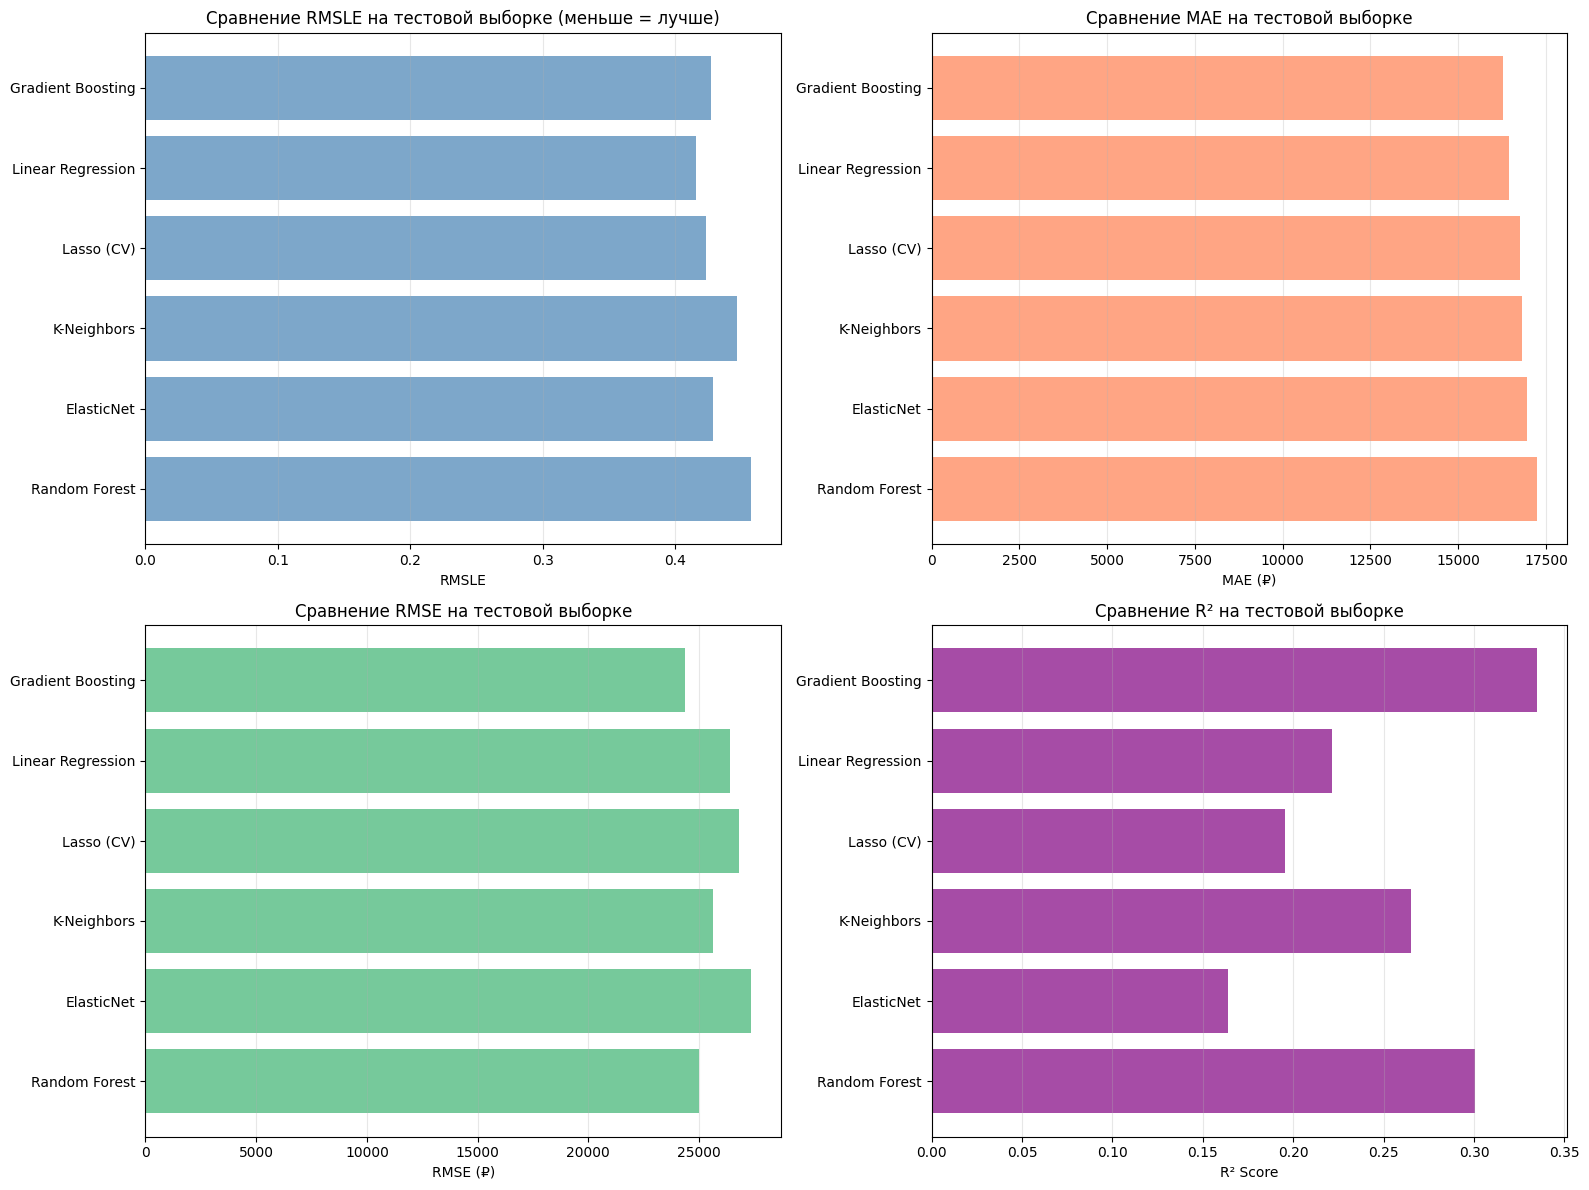

In [32]:
# Визуализация результатов сравнения моделей
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Сравнение Test RMSLE
ax1 = axes[0, 0]
ax1.barh(results_df['Model'], results_df['Test RMSLE'], color='steelblue', alpha=0.7)
ax1.set_xlabel('RMSLE')
ax1.set_title('Сравнение RMSLE на тестовой выборке (меньше = лучше)')
ax1.grid(alpha=0.3, axis='x')
ax1.invert_yaxis()

# График 2: Сравнение Test MAE
ax2 = axes[0, 1]
ax2.barh(results_df['Model'], results_df['Test MAE'], color='coral', alpha=0.7)
ax2.set_xlabel('MAE (₽)')
ax2.set_title('Сравнение MAE на тестовой выборке')
ax2.grid(alpha=0.3, axis='x')
ax2.invert_yaxis()

# График 3: Сравнение Test RMSE
ax3 = axes[1, 0]
ax3.barh(results_df['Model'], results_df['Test RMSE'], color='mediumseagreen', alpha=0.7)
ax3.set_xlabel('RMSE (₽)')
ax3.set_title('Сравнение RMSE на тестовой выборке')
ax3.grid(alpha=0.3, axis='x')
ax3.invert_yaxis()

# График 4: Сравнение Test R²
ax4 = axes[1, 1]
ax4.barh(results_df['Model'], results_df['Test R²'], color='purple', alpha=0.7)
ax4.set_xlabel('R² Score')
ax4.set_title('Сравнение R² на тестовой выборке')
ax4.grid(alpha=0.3, axis='x')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()


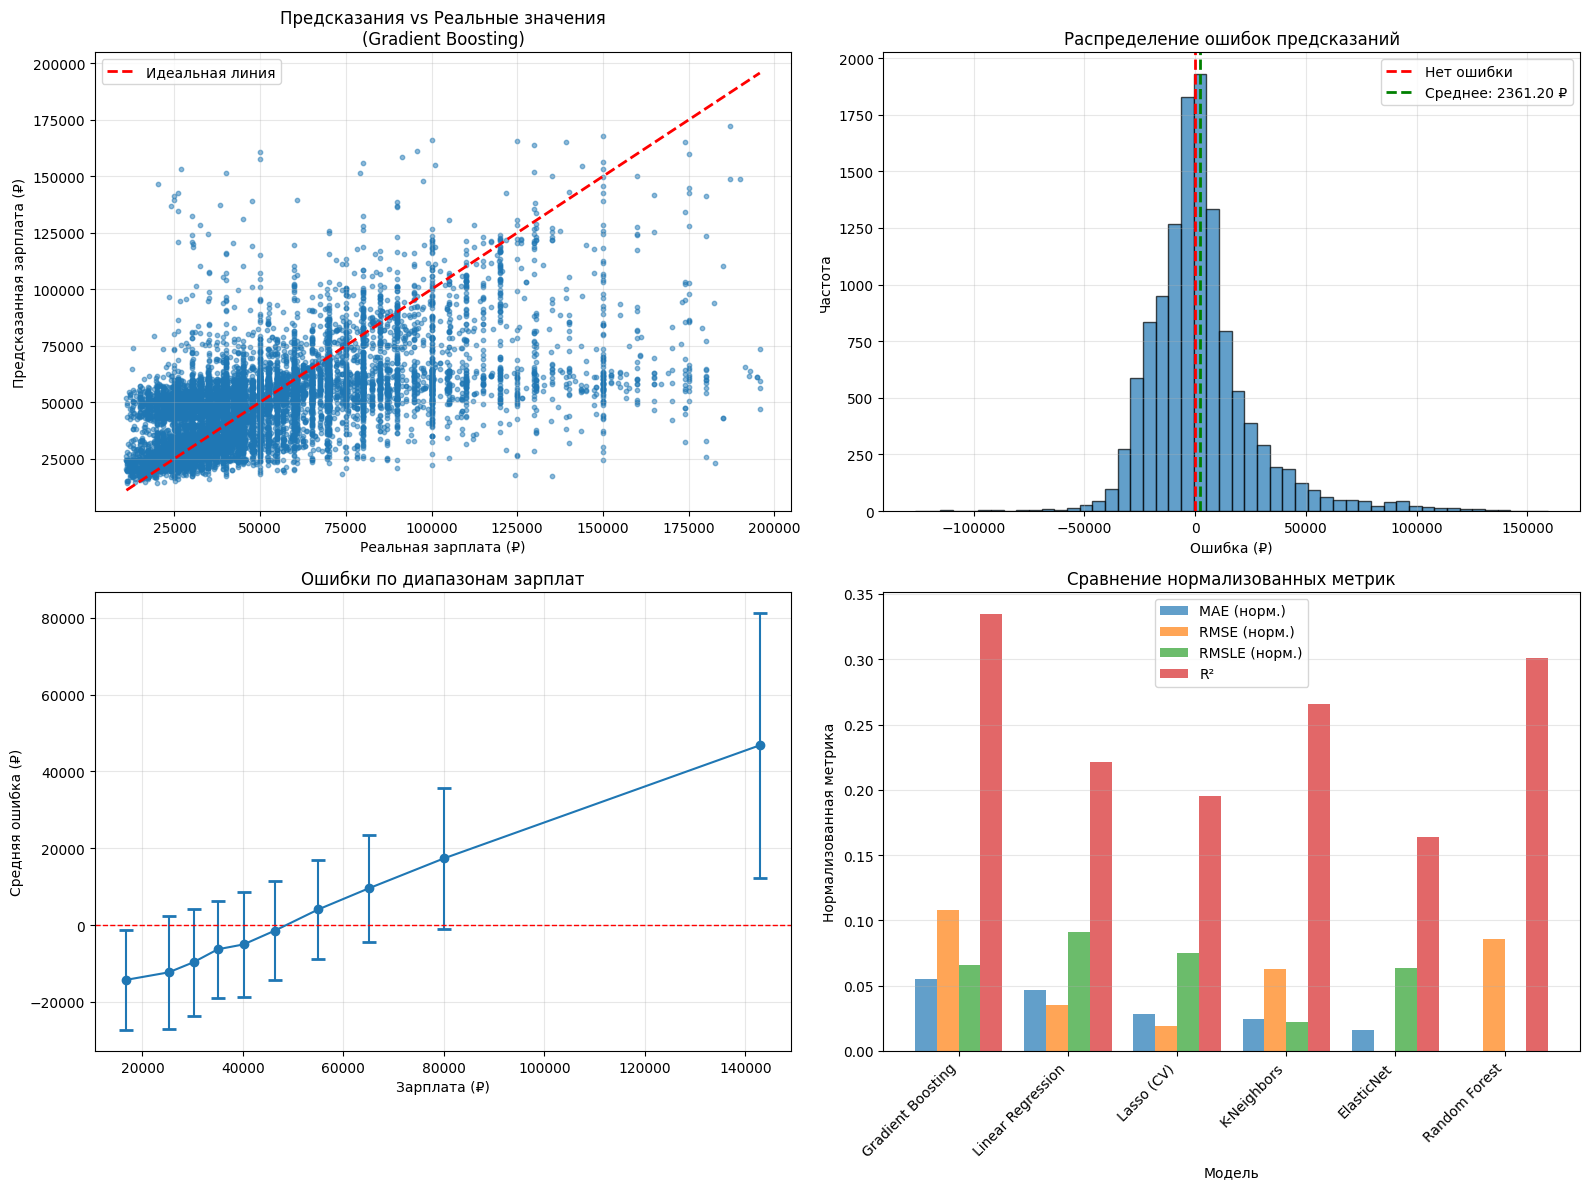

In [33]:
# Визуализация предсказаний лучшей модели
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Предсказания vs Реальные значения
ax1 = axes[0, 0]
ax1.scatter(y_test_original, y_pred_best, alpha=0.5, s=10)
ax1.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Идеальная линия')
ax1.set_xlabel('Реальная зарплата (₽)')
ax1.set_ylabel('Предсказанная зарплата (₽)')
ax1.set_title(f'Предсказания vs Реальные значения\n({best_model_name})')
ax1.legend()
ax1.grid(alpha=0.3)

# График 2: Распределение ошибок
ax2 = axes[0, 1]
errors = y_test_original - y_pred_best
ax2.hist(errors, bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
ax2.axvline(errors.mean(), color='green', linestyle='--', linewidth=2, 
           label=f'Среднее: {errors.mean():.2f} ₽')
ax2.set_xlabel('Ошибка (₽)')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение ошибок предсказаний')
ax2.legend()
ax2.grid(alpha=0.3)

# График 3: Ошибки по диапазонам зарплат
ax3 = axes[1, 0]
# Создаем бины для зарплат
salary_bins = pd.qcut(y_test_original, q=10, duplicates='drop')
bin_errors = pd.DataFrame({
    'salary_bin': salary_bins,
    'error': errors
}).groupby('salary_bin')['error'].agg(['mean', 'std']).reset_index()
bin_errors['bin_center'] = [interval.mid for interval in bin_errors['salary_bin']]

ax3.errorbar(bin_errors['bin_center'], bin_errors['mean'], 
            yerr=bin_errors['std'], fmt='o-', capsize=5, capthick=2)
ax3.axhline(0, color='red', linestyle='--', linewidth=1)
ax3.set_xlabel('Зарплата (₽)')
ax3.set_ylabel('Средняя ошибка (₽)')
ax3.set_title('Ошибки по диапазонам зарплат')
ax3.grid(alpha=0.3)

# График 4: Сравнение метрик всех моделей (комбинированный)
ax4 = axes[1, 1]
x_pos = np.arange(len(results_df))
width = 0.2

# Нормализуем метрики для сравнения
normalized_mae = 1 - (results_df['Test MAE'] / results_df['Test MAE'].max())
normalized_rmse = 1 - (results_df['Test RMSE'] / results_df['Test RMSE'].max())
normalized_rmsle = 1 - (results_df['Test RMSLE'] / results_df['Test RMSLE'].max())
normalized_r2 = results_df['Test R²']

ax4.bar(x_pos - 1.5*width, normalized_mae, width, label='MAE (норм.)', alpha=0.7)
ax4.bar(x_pos - 0.5*width, normalized_rmse, width, label='RMSE (норм.)', alpha=0.7)
ax4.bar(x_pos + 0.5*width, normalized_rmsle, width, label='RMSLE (норм.)', alpha=0.7)
ax4.bar(x_pos + 1.5*width, normalized_r2, width, label='R²', alpha=0.7)
ax4.set_xlabel('Модель')
ax4.set_ylabel('Нормализованная метрика')
ax4.set_title('Сравнение нормализованных метрик')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.legend()
ax4.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
